In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Non-Positional Encodings for Third Variables

In [3]:
fuel_econ = pd.read_csv('../data/fuel_econ.csv')
fuel_econ.head()
#fuel_econ['trans'].unique()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [4]:
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 2000, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

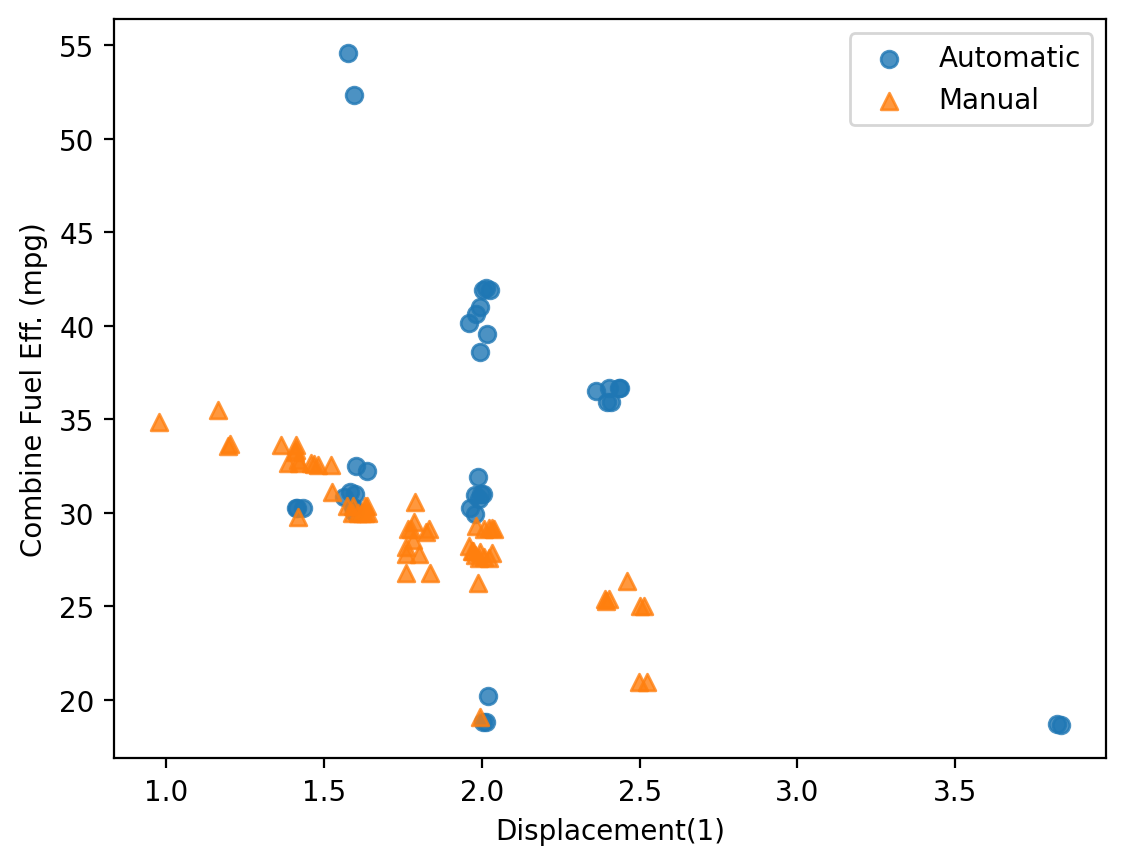

In [5]:
ttype_markers = [['Automatic (AM6)', 'o'], 
                 ['Manual 5-spd', '^']]

for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans'] == ttype]
    sns.regplot(data = plot_data, x = 'displ', y = 'comb', x_jitter = 0.04, fit_reg = False, marker = marker);
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)')
plt.legend(['Automatic', 'Manual'])

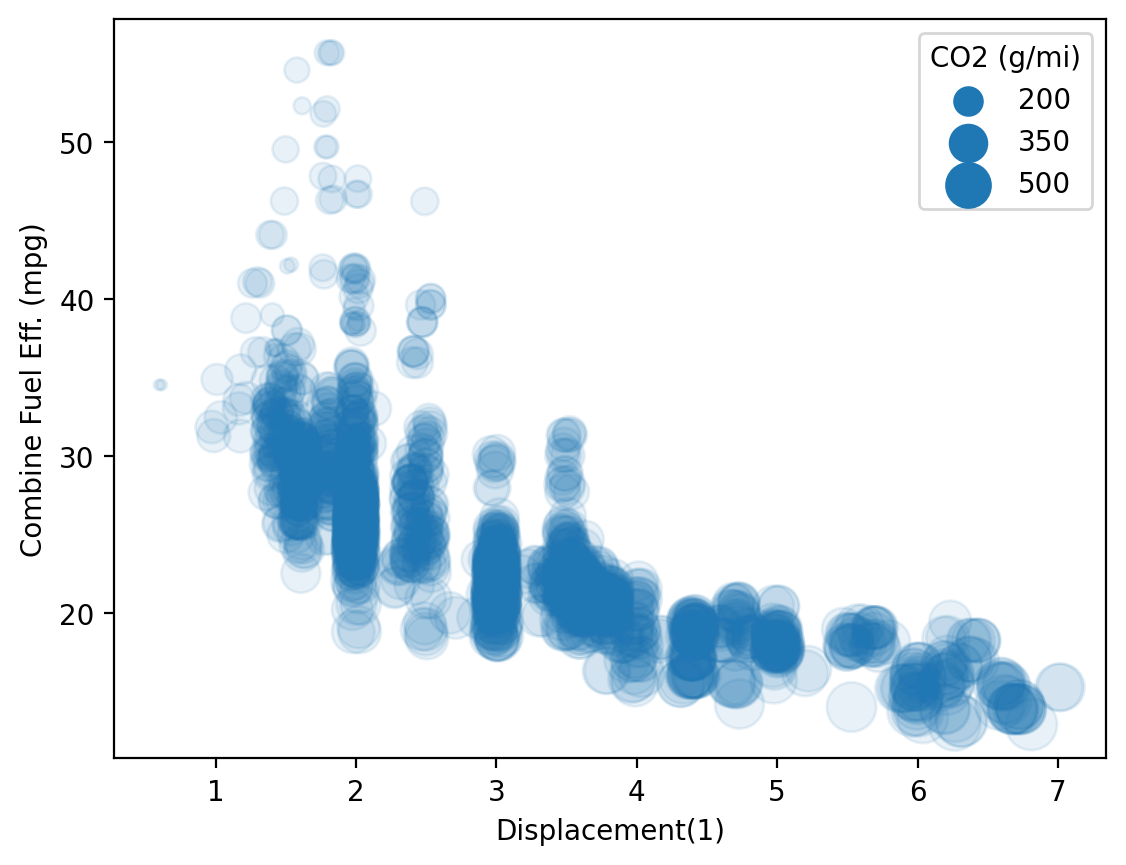

In [6]:
sns.regplot(
    data=fuel_econ_subset,
    x='displ',
    y='comb',
    x_jitter=0.04,
    fit_reg=False,
    scatter_kws={'s': fuel_econ_subset['co2']/2, 'alpha': 0.1}
);
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');

sizes = [200, 350, 500]
base_color = sns.color_palette()[0]
legend_obj = []
for s in sizes: 
    legend_obj.append(plt.scatter([], [], s=s/2, color = base_color))
plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)');

In [7]:
# There are four major cases to consider when we want to plot three variables together:

# Three numeric variables
# Two numeric variables and one categorical variable
# One numeric variable and two categorical variables
# Three categorical variables

In [8]:
# Three main non-positional encodings stand out:

# shape
# size
# color

In [9]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

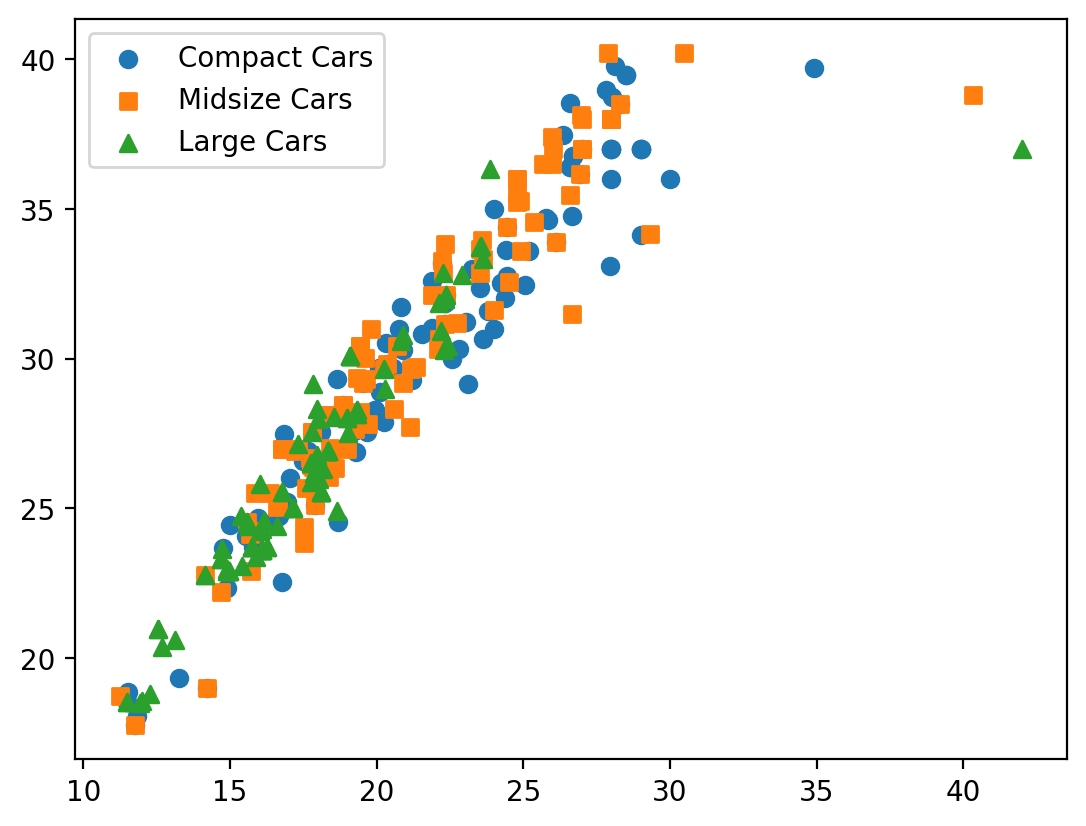

In [10]:
cat_markers = [
    ['Compact Cars', 'o'],
    ['Midsize Cars', 's'],
    ['Large Cars','^']
    ]

for cat, marker in cat_markers:
    df_cat = fuel_econ[fuel_econ['VClass'] == cat][:100]
    plt.scatter(data = df_cat, x = 'city', y = 'highway', marker = marker)
plt.legend([m[0] for m in cat_markers])

In [11]:
# https://matplotlib.org/stable/api/markers_api.html

In [12]:
# https://matplotlib.org/2.0.2/examples/lines_bars_and_markers/marker_reference.html

In [13]:
# Encoding via Size

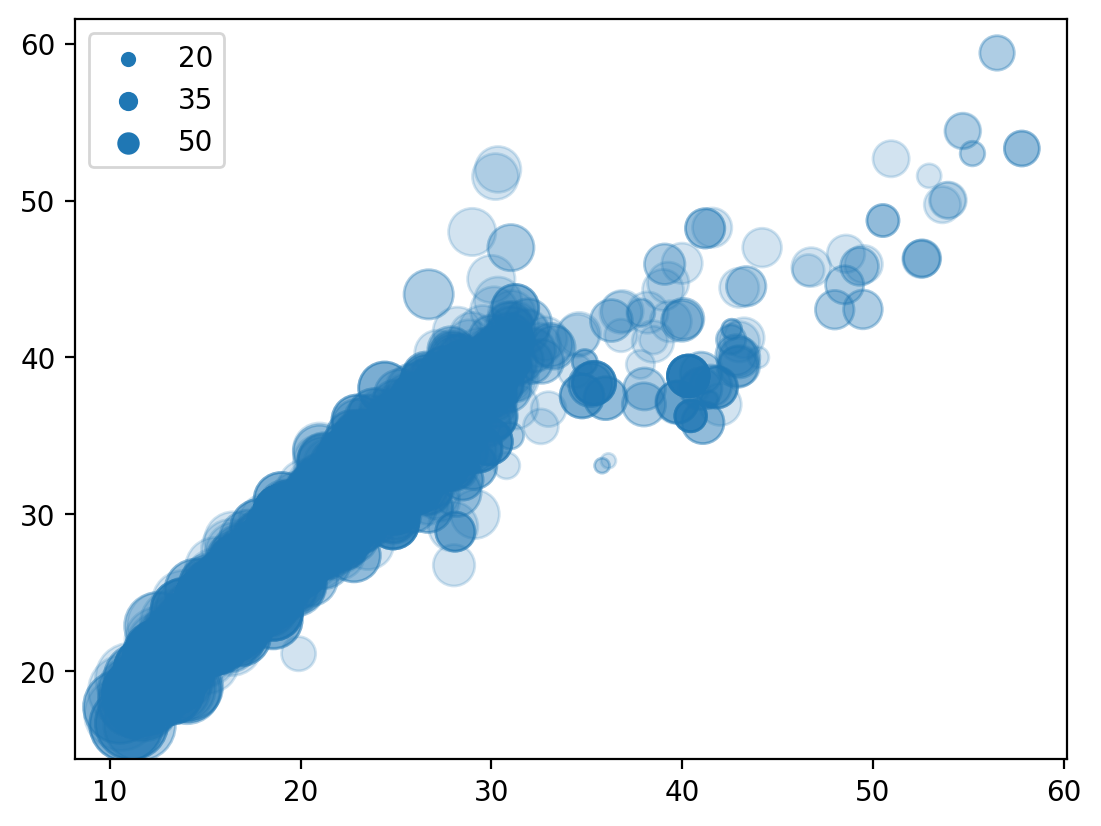

In [14]:
plt.scatter(data=fuel_econ, x='city', y='highway', s='co2', alpha=0.2)

# dummy series for adding legend
sizes = [20, 35, 50]
base_color = sns.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color)) #
plt.legend(legend_obj, sizes)

([], [])

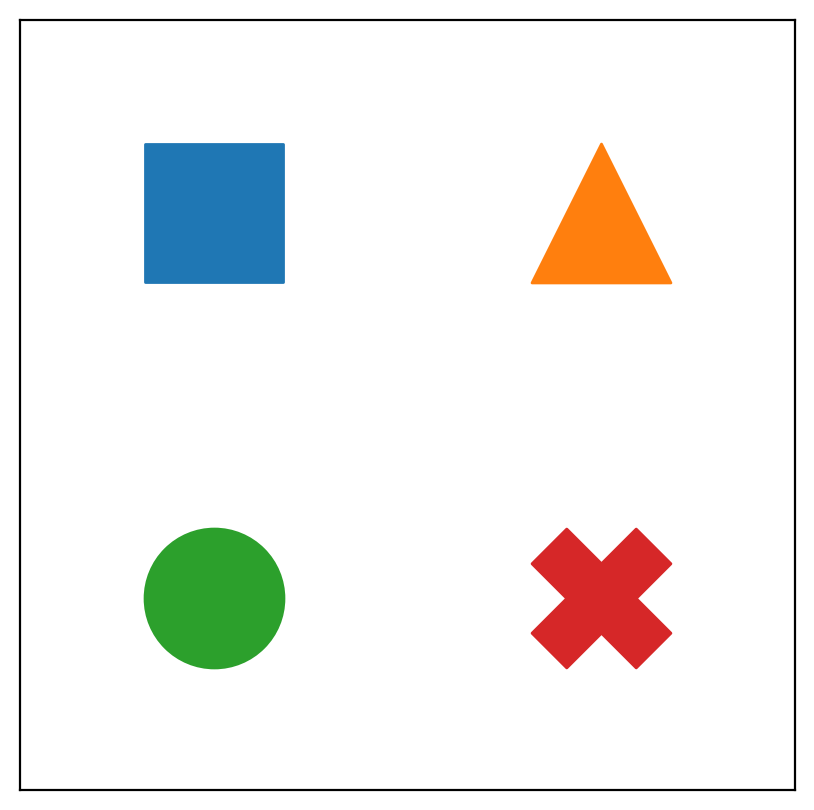

In [15]:
plt.figure(figsize = [5,5])

common_size = 2500
plt.scatter([0],[1], marker = 's', s = common_size)
plt.scatter([1],[1], marker = '^', s = common_size)
plt.scatter([0],[0], marker = 'o', s = common_size)
plt.scatter([1],[0], marker = 'X', s = common_size)

# a little bit of aesthetic cleaning
plt.xlim(-0.5,1.5)
plt.xticks([])
plt.ylim(-0.5,1.5)
plt.yticks([])

In [16]:
# Color Palettes

# Qualitative - distinct values
# Sequential - numeric from lo to high
# Diverging - two sequential with zero point

In [17]:
# https://daltonlens.org/colorblindness-simulator

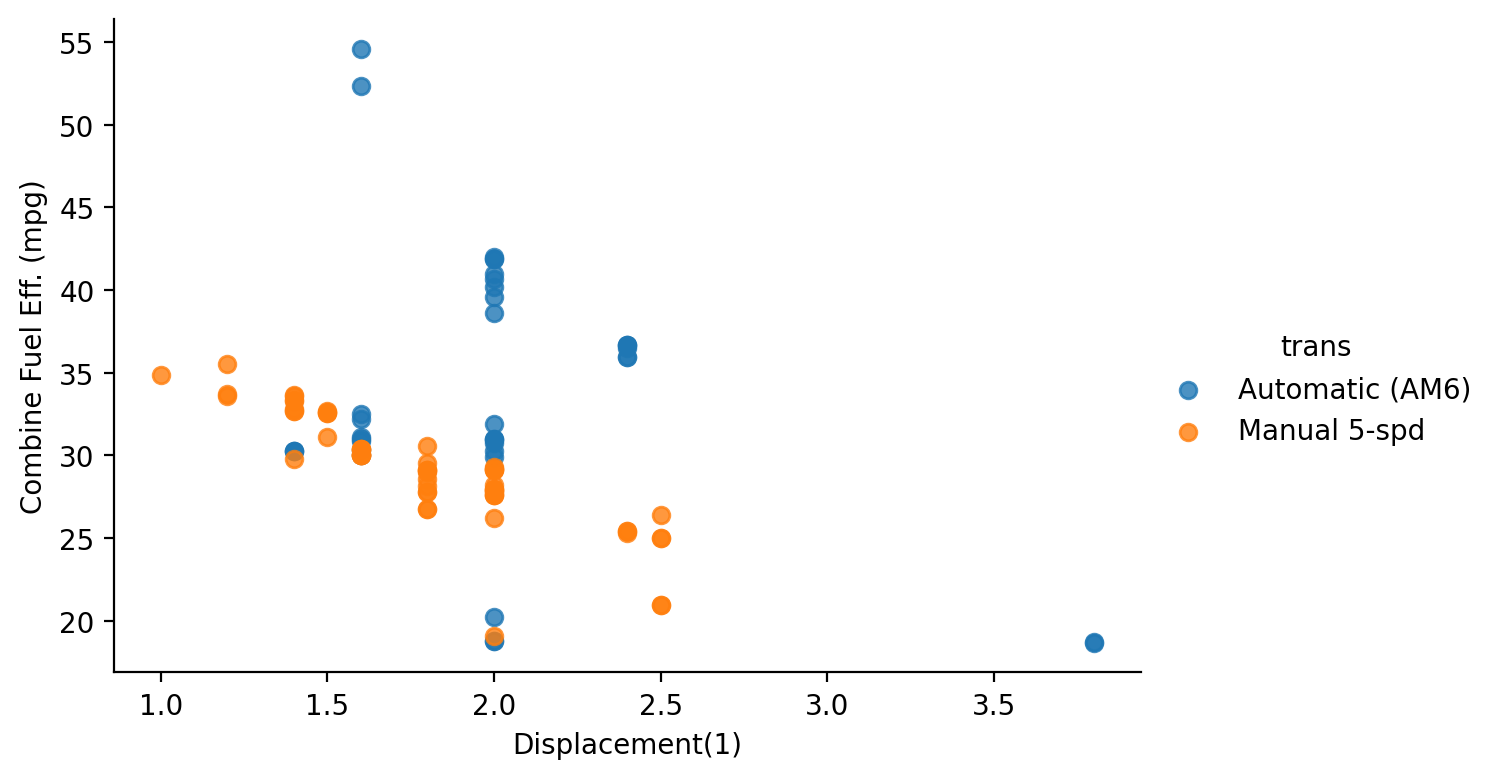

In [18]:
# Plot 1: Add Color based on Transmission Type
g = sns.FacetGrid(data = fuel_econ_subset, hue = 'trans', hue_order = ['Automatic (AM6)', 'Manual 5-spd'], height = 4, aspect = 1.5)
g.map(sns.regplot,'displ','comb', fit_reg = False);
g.add_legend()
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');

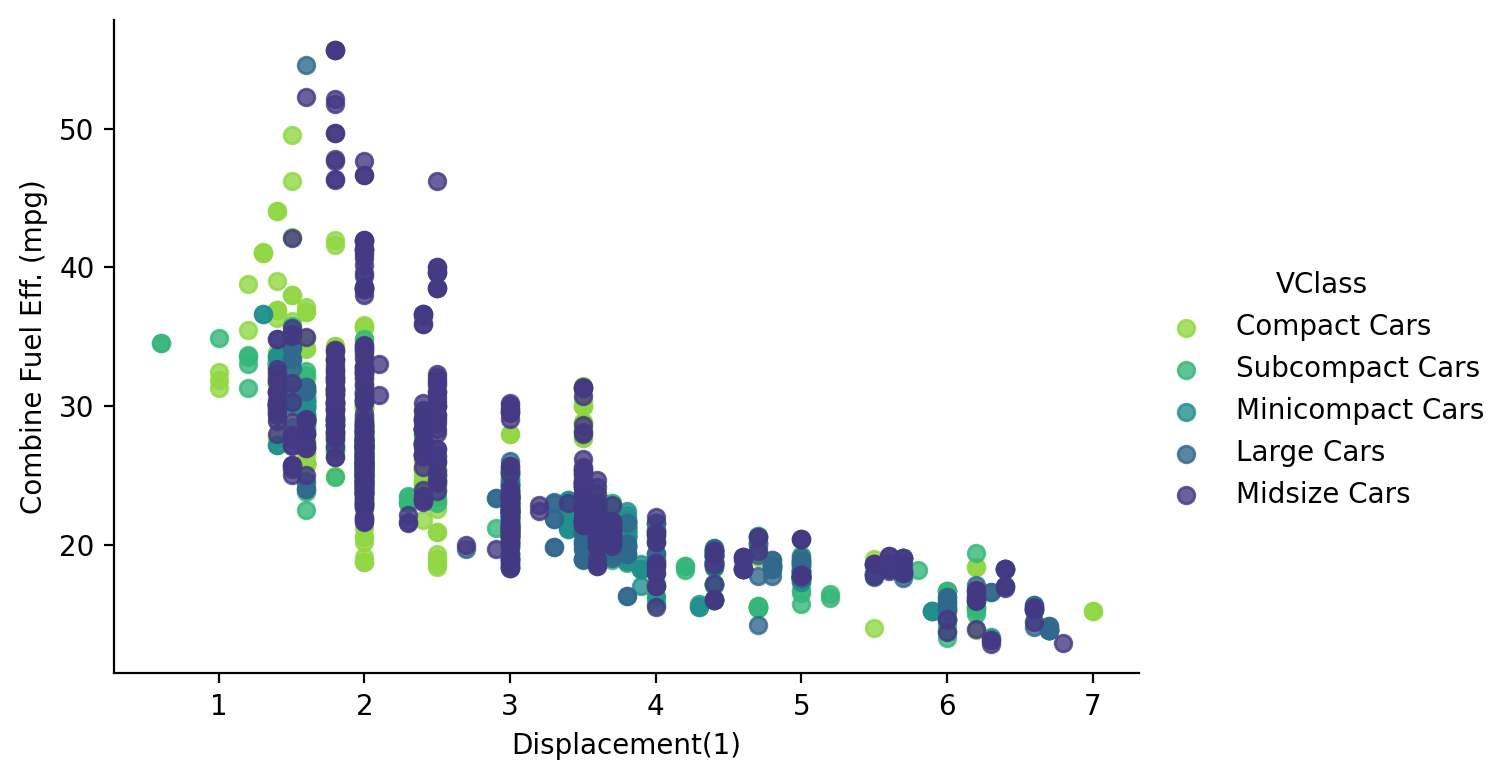

In [19]:
# Plot 2: Color based on Vehicle Class
g = sns.FacetGrid(data = fuel_econ_subset, hue = 'VClass', height = 4, aspect = 1.5, palette = 'viridis_r')
g.map(sns.regplot,'displ','comb', fit_reg = False);
g.add_legend()
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');

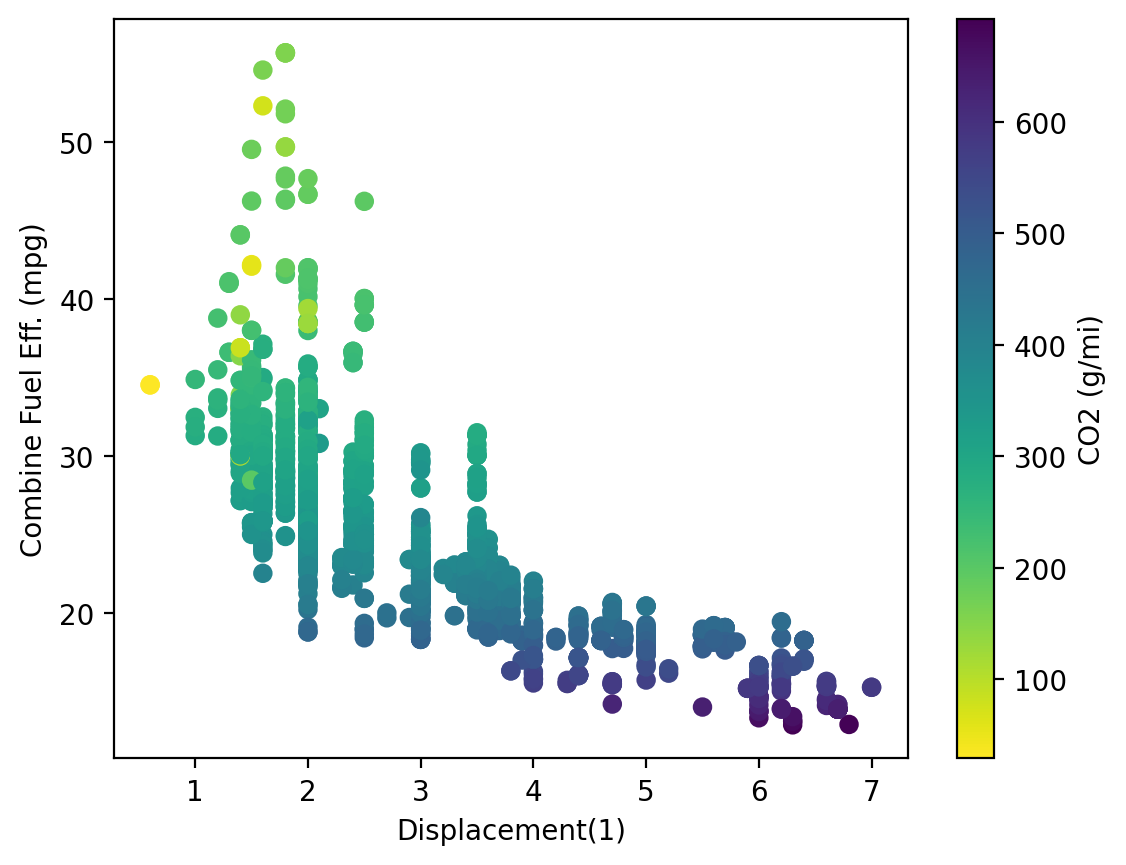

In [20]:
# Plot 3: Color based on CO2 Emissions

plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c = 'co2', cmap = 'viridis_r')
plt.colorbar(label ='CO2 (g/mi)')
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');

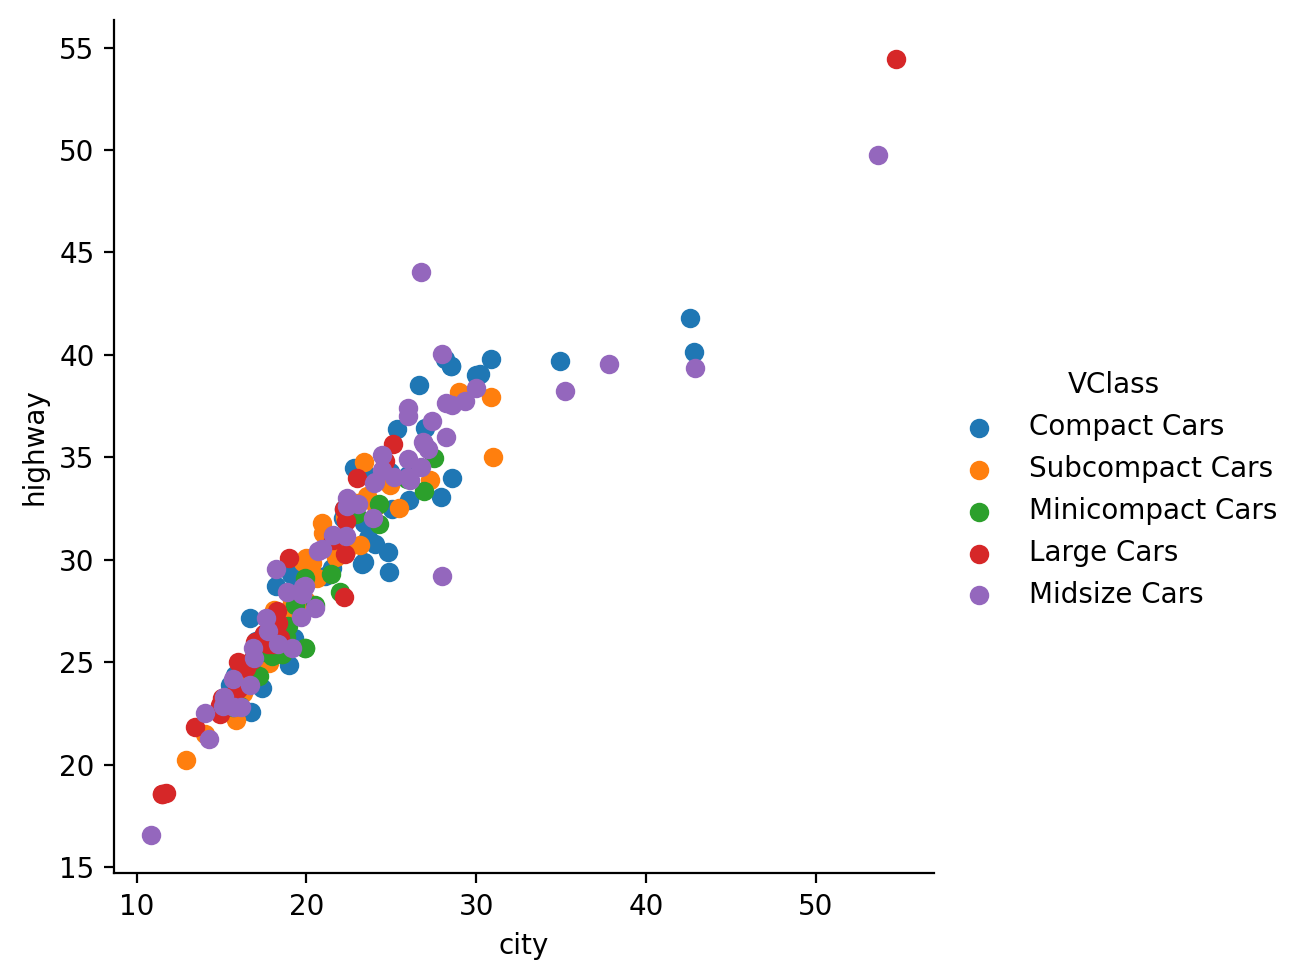

In [21]:
# Encoding via Color for a Qualitative Variable
g = sns.FacetGrid(data = fuel_econ_subset[:200], hue = 'VClass', height = 5)
g.map(plt.scatter, 'city', 'highway')
g.add_legend()

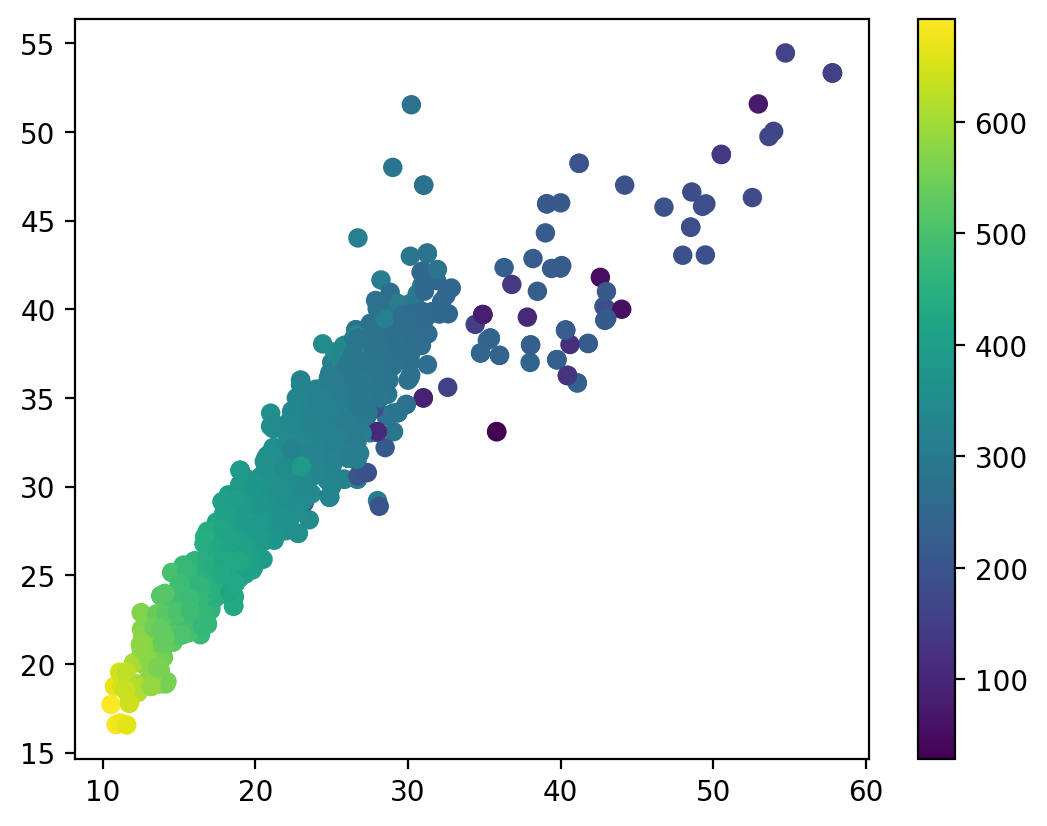

In [22]:
# Encoding via Color for a Quantitative Variable

plt.scatter(data = fuel_econ_subset, x = 'city', y = 'highway', c = 'co2')
plt.colorbar()

### Color Palettes

In [75]:
# https://seaborn.pydata.org/generated/seaborn.color_palette.html


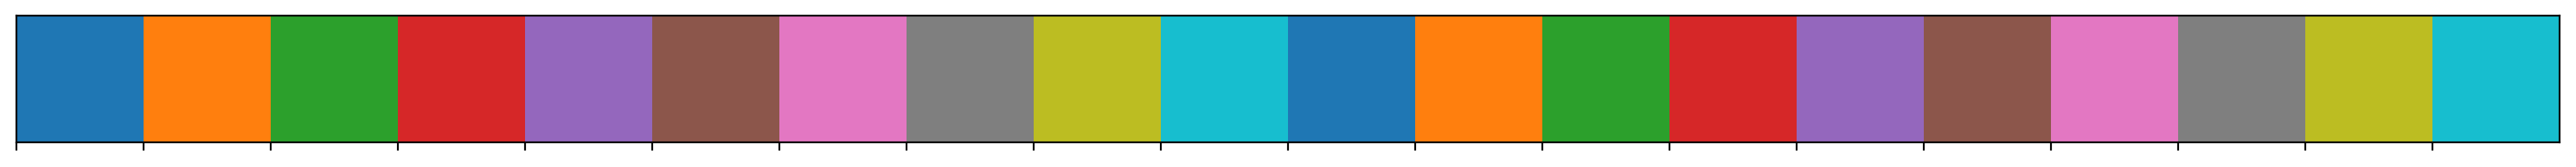

In [76]:
# Qualitative palettes are built for nominal-type data
sns.palplot(sns.color_palette(n_colors=20))

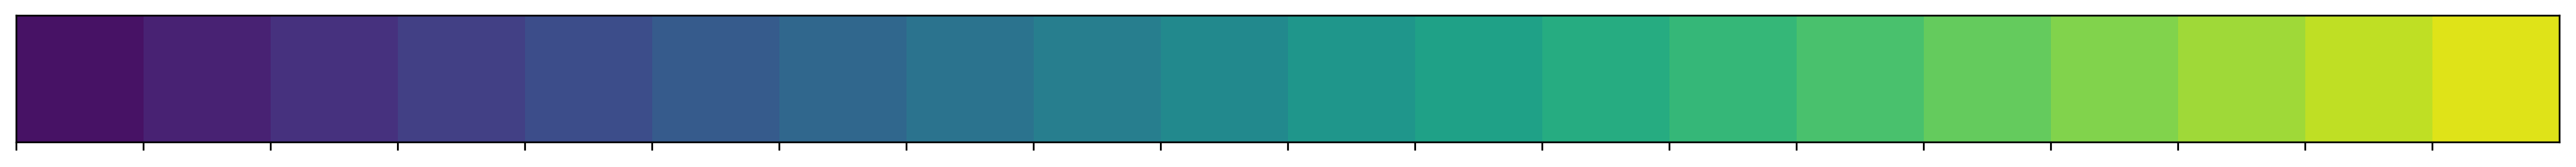

In [77]:
#  In a sequential palette, consecutive color values should follow each other systematically. Use for numeric value
sns.palplot(sns.color_palette('viridis', 20))

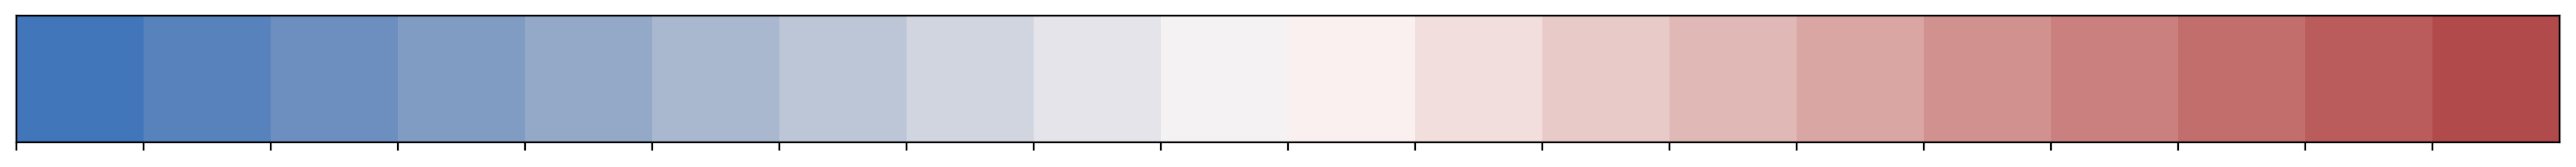

In [78]:
#  In a diverging palette, two sequential palettes with different hues are put back to back, with a common color (usually white or gray) connecting them. 
# One hue indicates values greater than the center point, while the other indicates values smaller than the center

sns.palplot(sns.color_palette('vlag', 20))


In [79]:
# https://matplotlib.org/stable/api/pyplot_summary.html#colormapping
# https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3

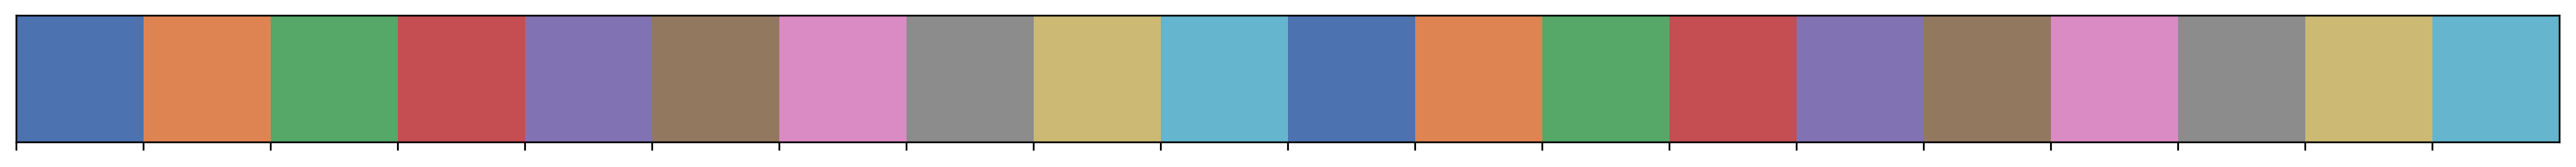

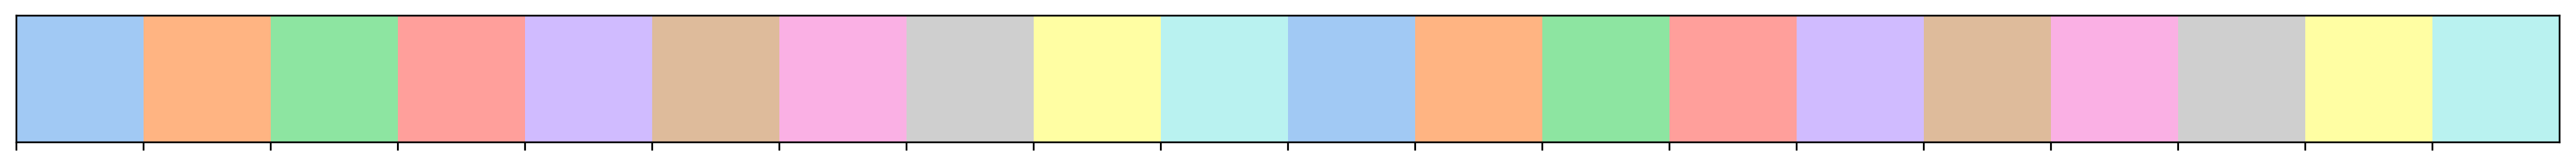

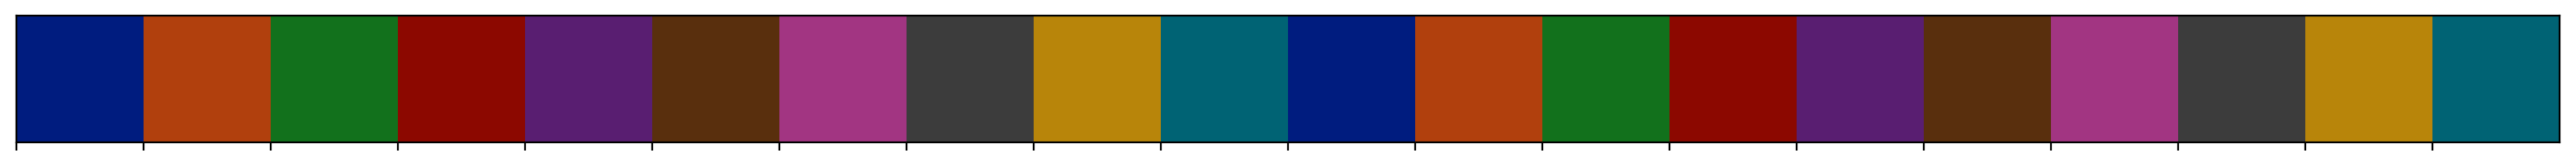

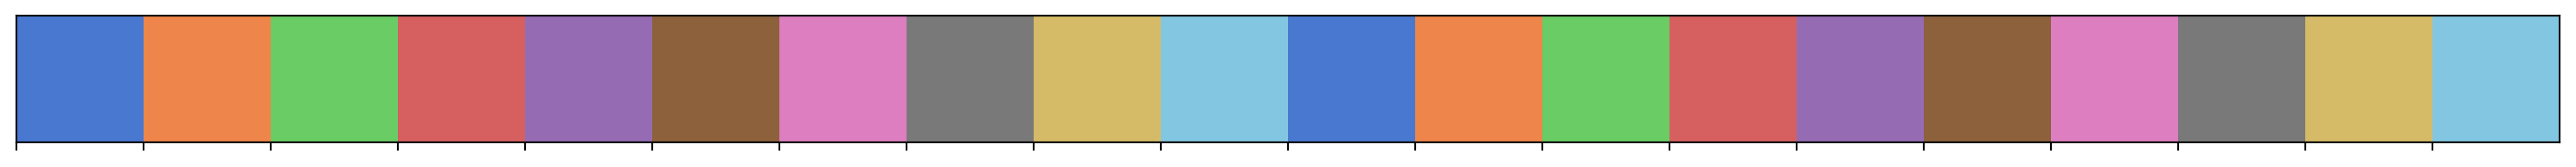

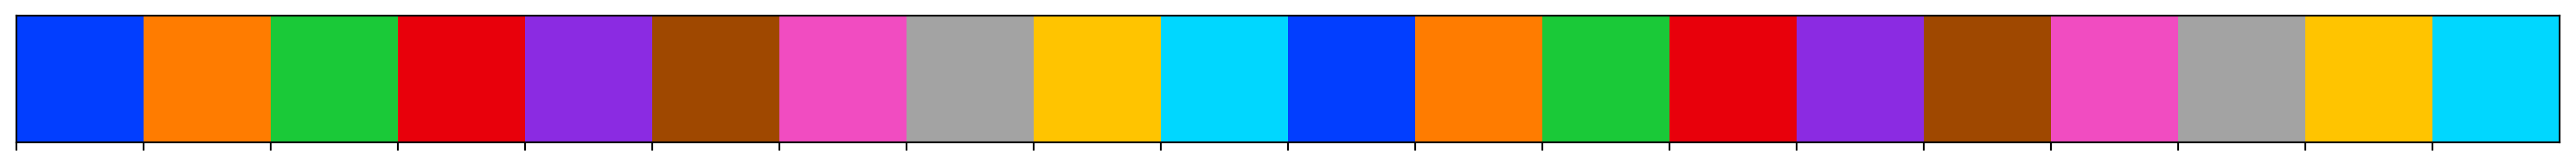

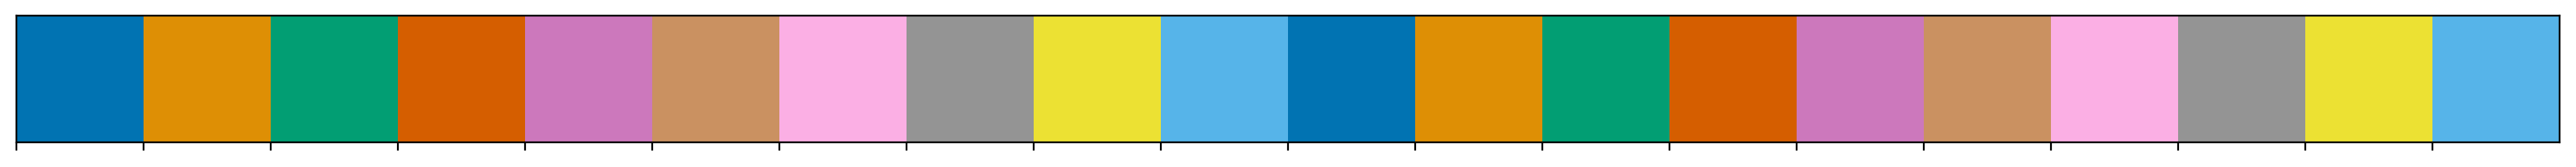

In [80]:
# Qualitative (all up to 6 colors): 'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'
sns.palplot(sns.color_palette('deep', 20))
sns.palplot(sns.color_palette('pastel', 20))
sns.palplot(sns.color_palette('dark', 20))
sns.palplot(sns.color_palette('muted', 20))
sns.palplot(sns.color_palette('bright', 20))
sns.palplot(sns.color_palette('colorblind', 20))

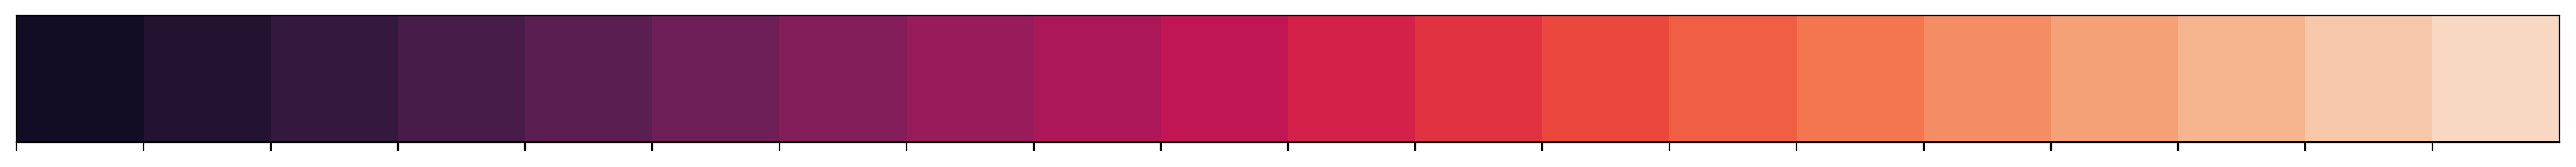

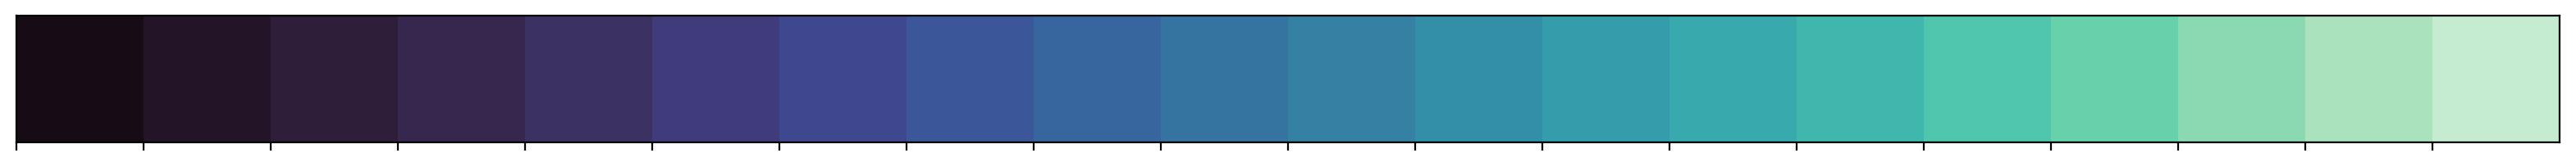

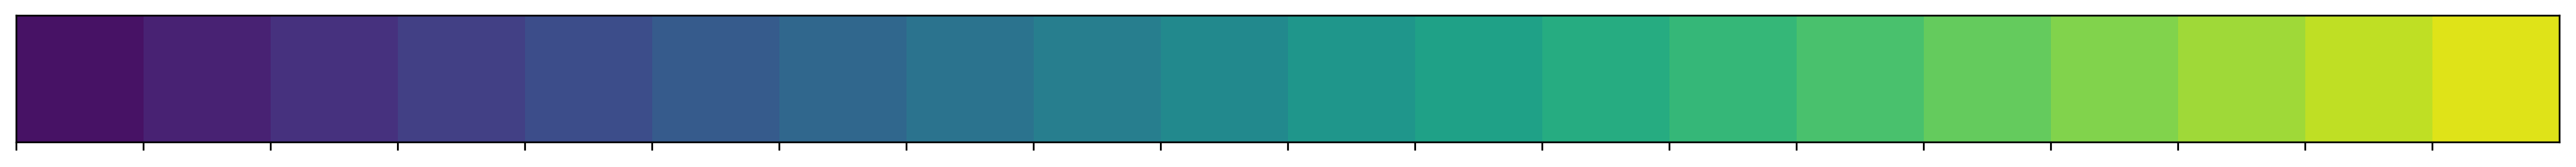

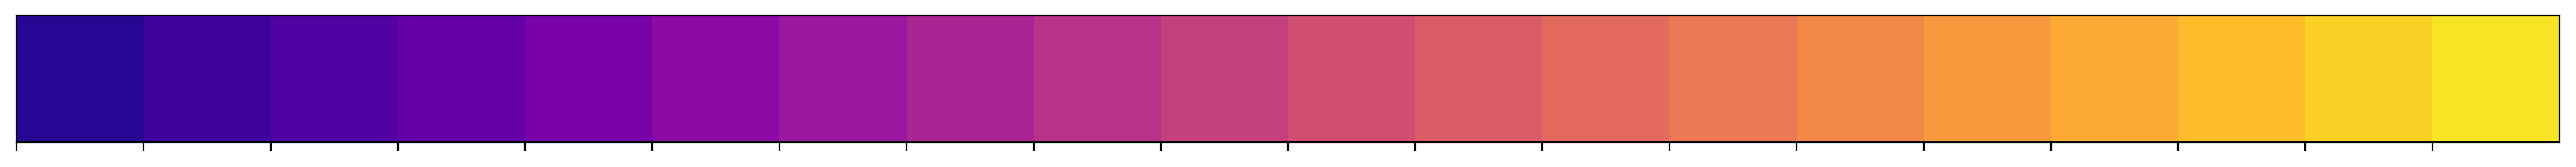

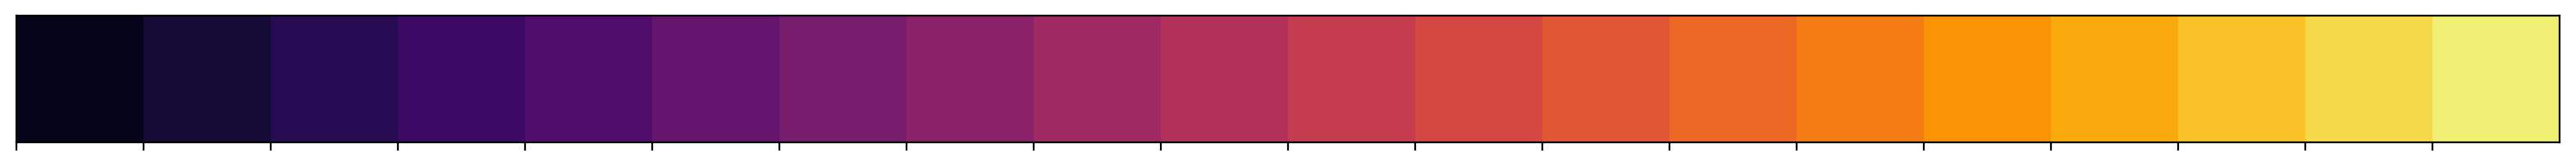

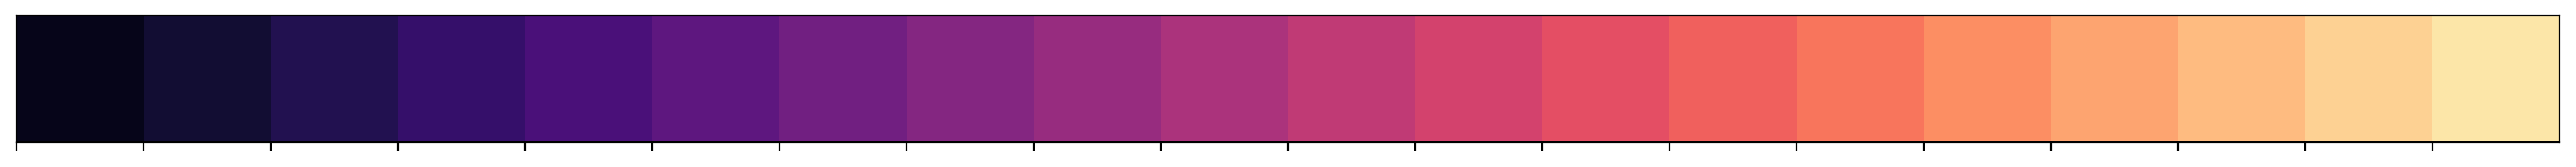

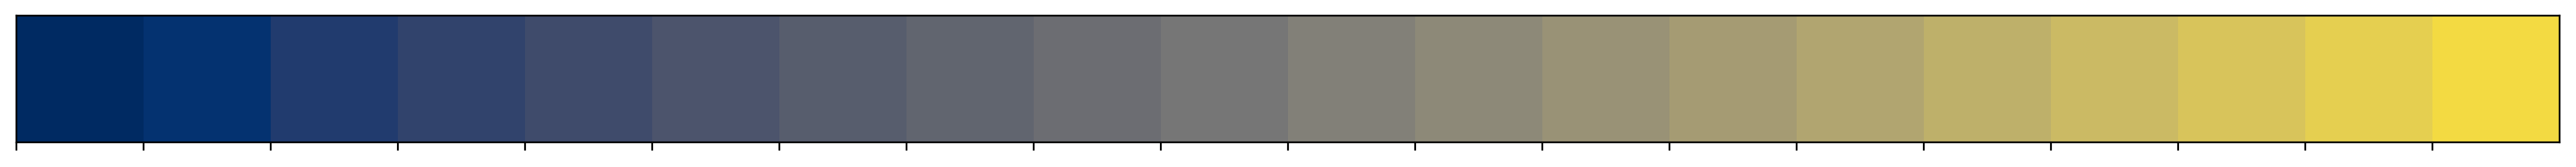

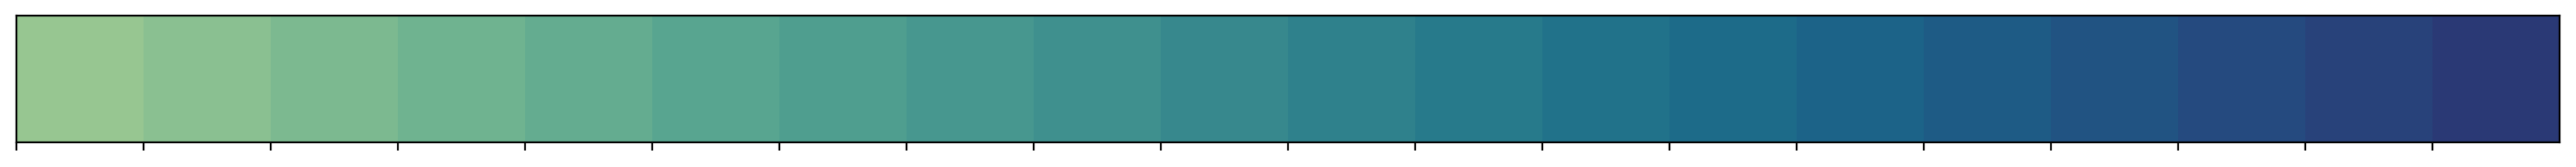

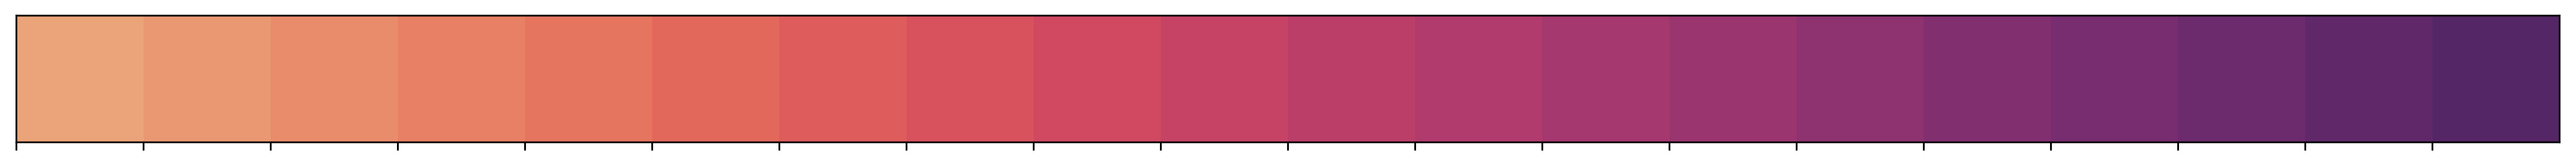

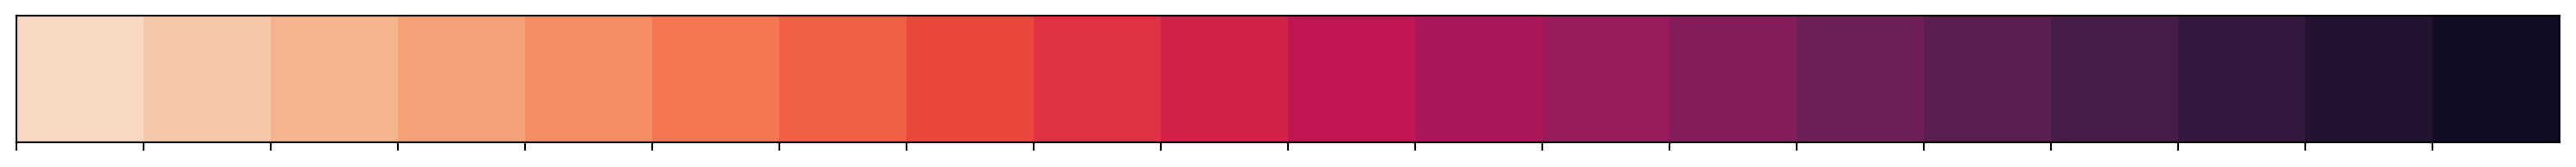

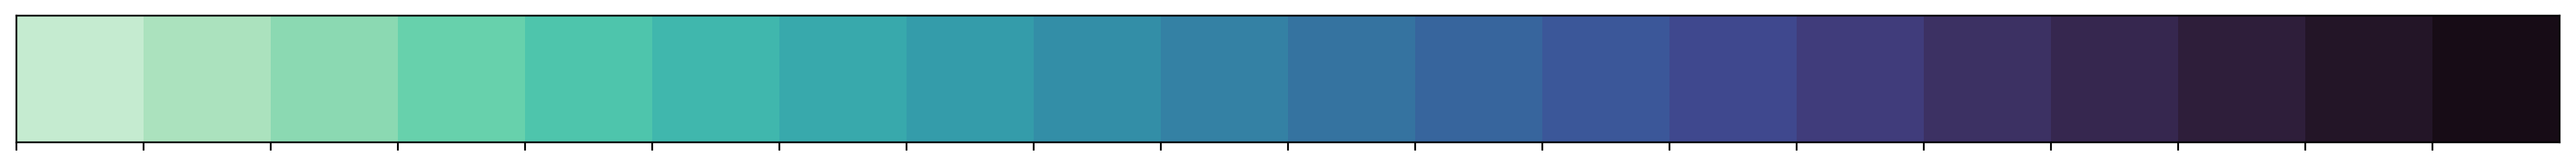

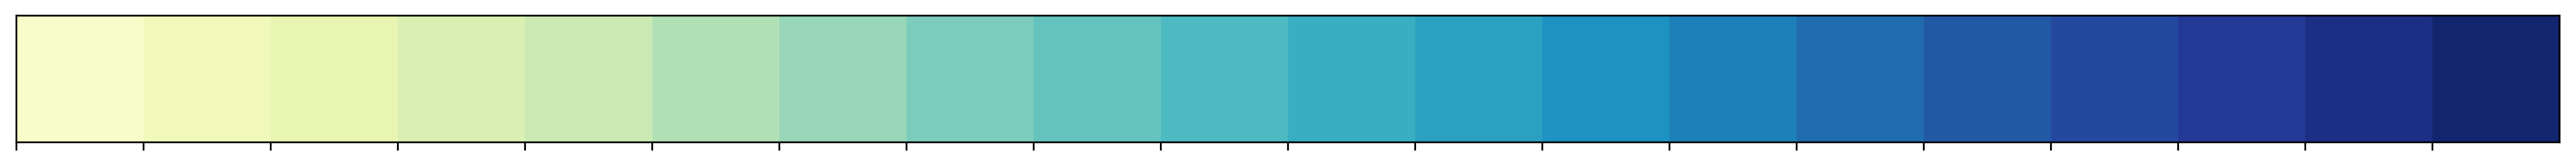

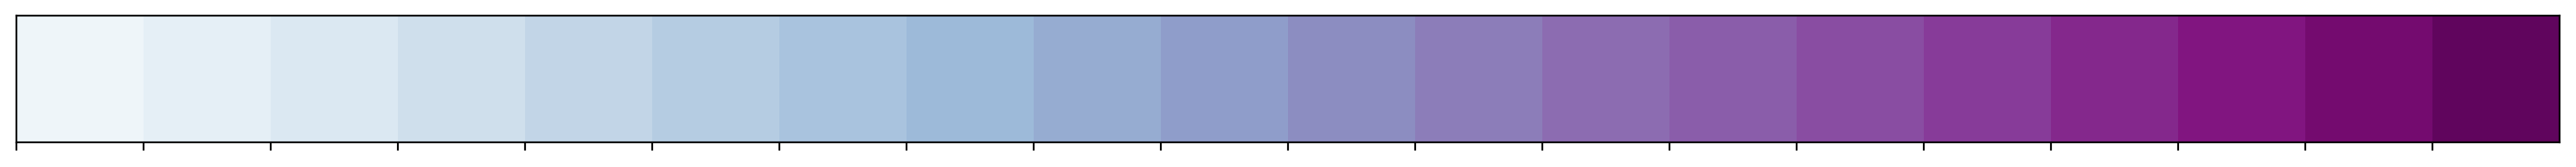

In [81]:
# Sequential: 'rocket' (white-orange-red-purple-black), 'mako' (mint-green-blue-purple-black)

sns.palplot(sns.color_palette('rocket', 20))
sns.palplot(sns.color_palette('mako', 20))
sns.palplot(sns.color_palette('viridis', 20))
sns.palplot(sns.color_palette('plasma', 20))
sns.palplot(sns.color_palette('inferno', 20))
sns.palplot(sns.color_palette('magma', 20))
sns.palplot(sns.color_palette('cividis', 20))
sns.palplot(sns.color_palette('crest', 20))
sns.palplot(sns.color_palette('flare', 20))
sns.palplot(sns.color_palette('rocket_r', 20))
sns.palplot(sns.color_palette('mako_r', 20))
sns.palplot(sns.color_palette('YlGnBu', 20))
sns.palplot(sns.color_palette('BuPu', 20))

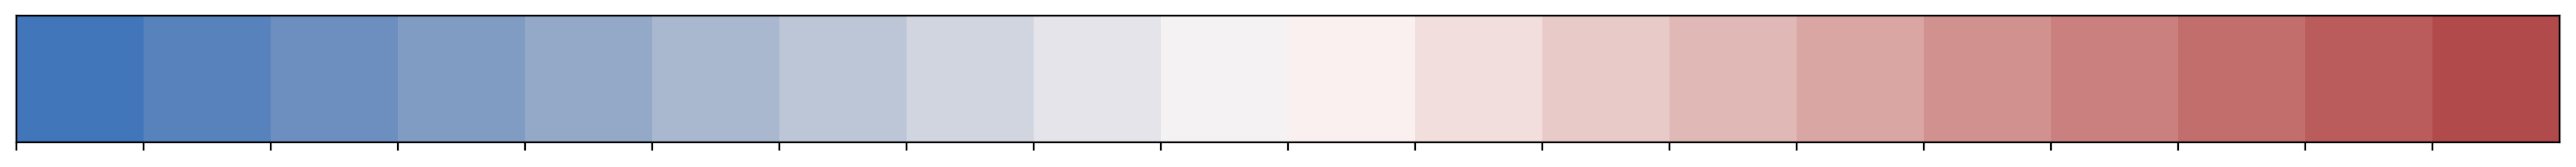

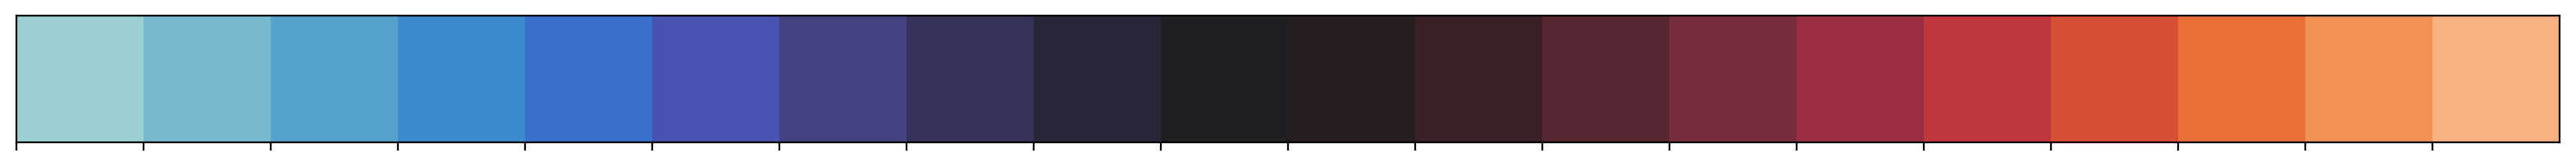

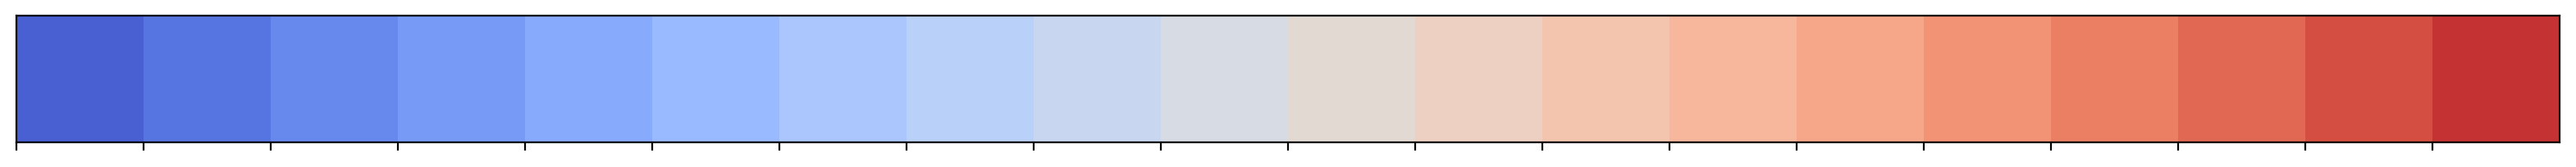

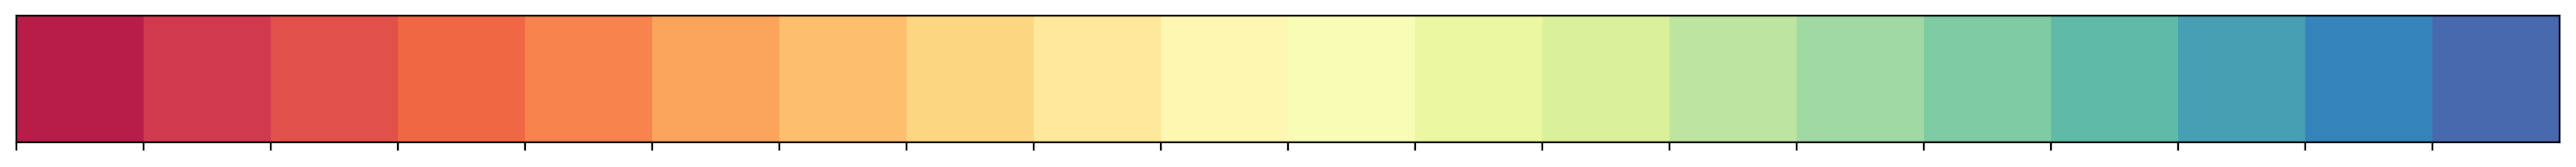

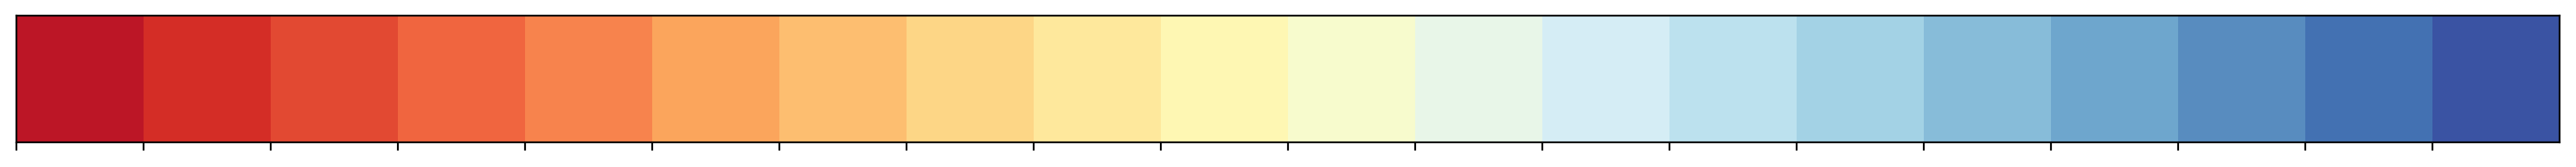

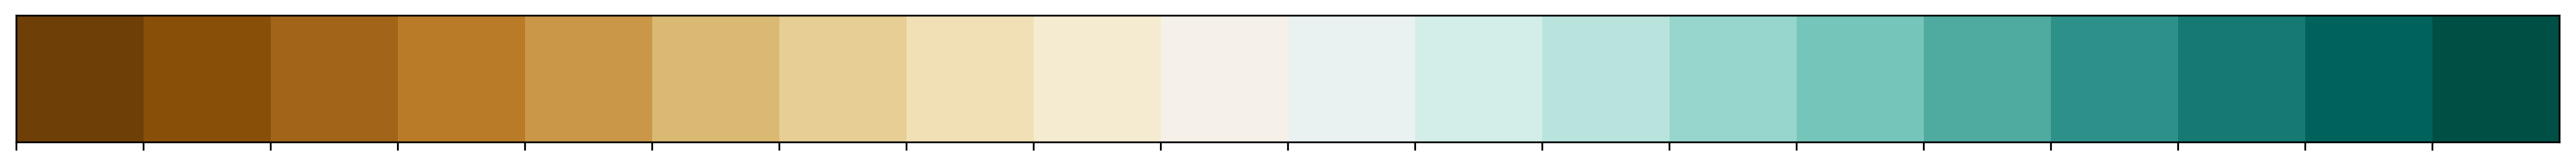

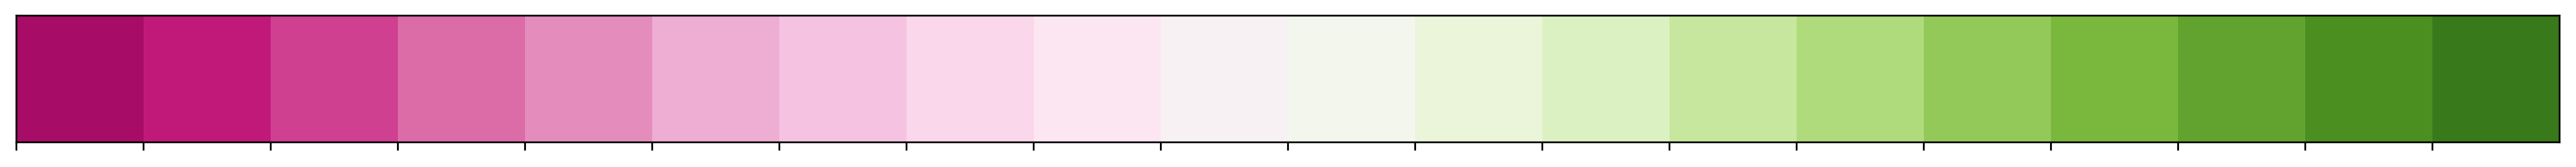

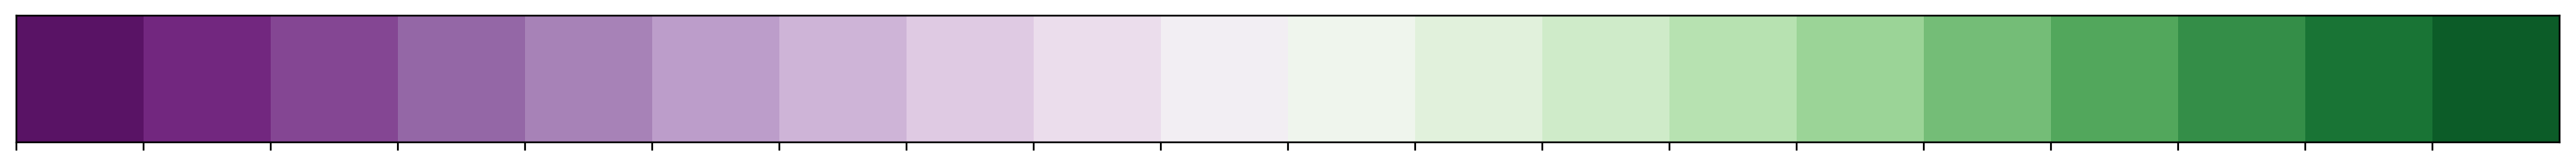

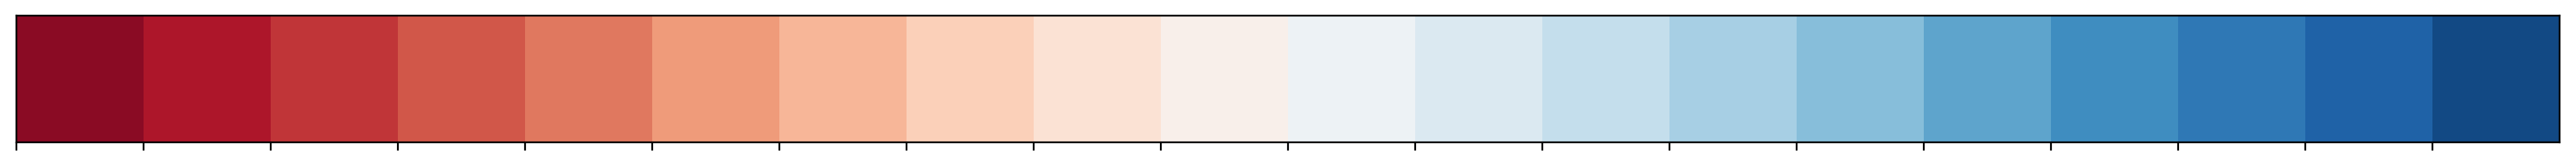

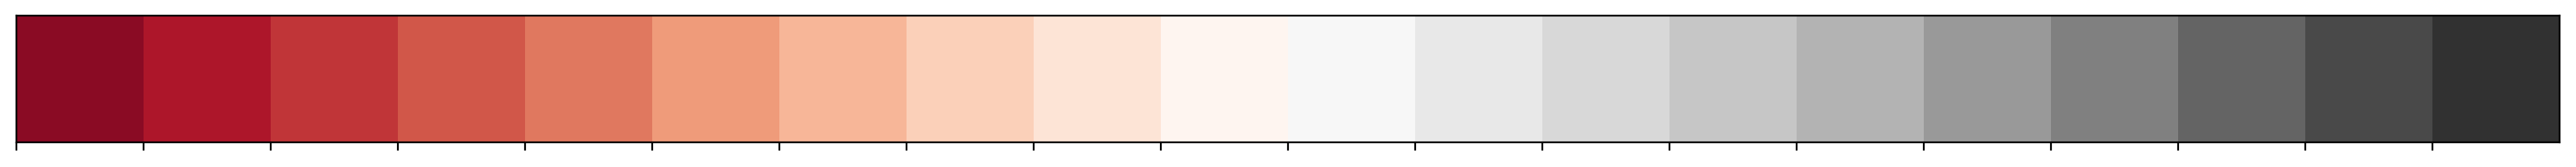

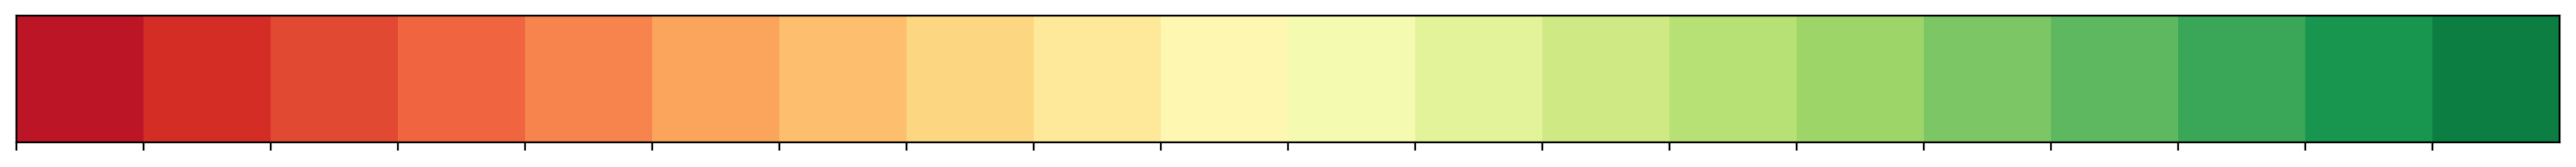

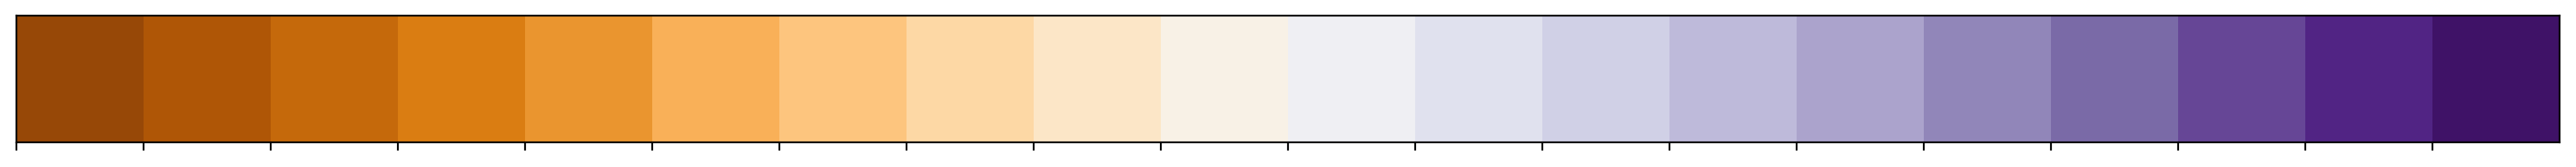

In [82]:
# Diverging: 'vlag' (blue-white-red), 'icefire' (blue-black-orange)

sns.palplot(sns.color_palette('vlag', 20))
sns.palplot(sns.color_palette('icefire', 20))
sns.palplot(sns.color_palette('coolwarm', 20))
sns.palplot(sns.color_palette('Spectral', 20))
sns.palplot(sns.color_palette('RdYlBu', 20))
sns.palplot(sns.color_palette('BrBG', 20))
sns.palplot(sns.color_palette('PiYG', 20))
sns.palplot(sns.color_palette('PRGn', 20))
sns.palplot(sns.color_palette('RdBu', 20))
sns.palplot(sns.color_palette('RdGy', 20))
sns.palplot(sns.color_palette('RdYlGn', 20))
sns.palplot(sns.color_palette('PuOr', 20))

In [83]:
# For all of these strings, appending '_r' reverses the palette, which is useful if a sequential or diverging palette is rendered counter to your expectations.

In [84]:
# NORMALIZE VALUES 
# https://stackoverflow.com/questions/20144529/shifted-colorbar-matplotlib

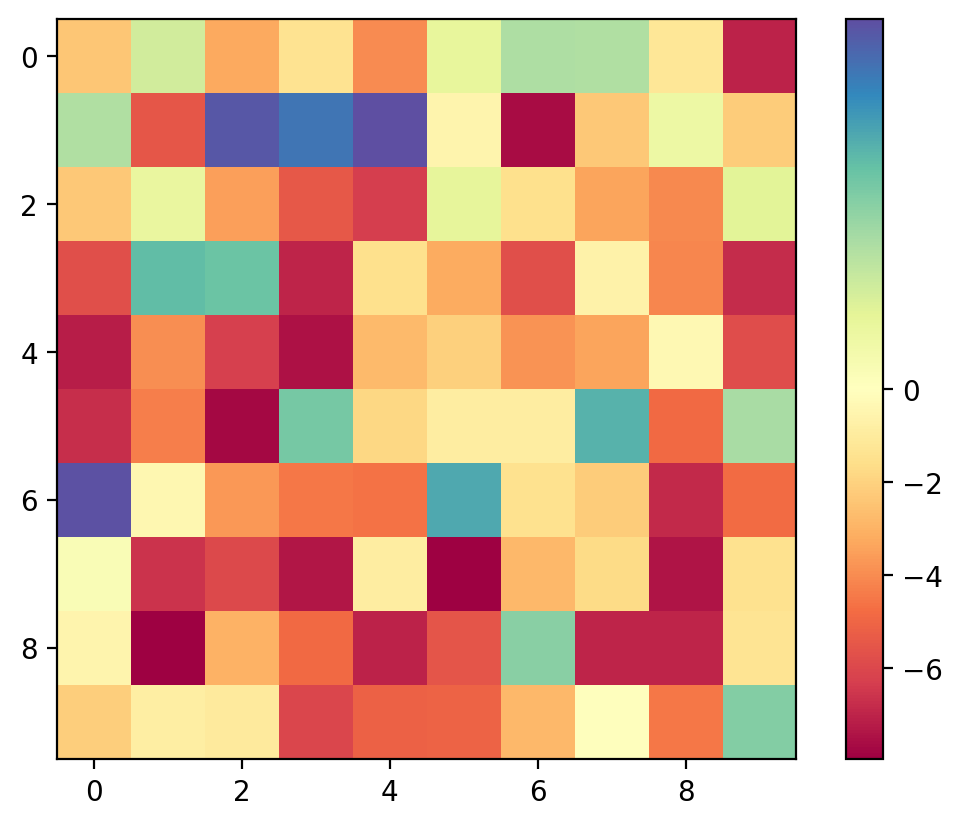

In [85]:
from matplotlib.colors import TwoSlopeNorm

data = np.random.random((10,10))
data = 10 * (data - 0.8)

fig, ax = plt.subplots()
im = ax.imshow(data, norm=TwoSlopeNorm(vcenter=0), cmap=plt.cm.Spectral, interpolation='none')
fig.colorbar(im)
plt.show()

In [86]:
# The `norm` parameter in `imshow` (and other Matplotlib plotting functions) controls how data values are mapped to colors in the colormap.

# By default, `imshow` linearly maps the minimum and maximum data values to the lower and upper ends of the colormap. 
# The `norm` parameter lets you customize this mapping. For example:


# norm=None` (default): Linear mapping.

# norm=TwoSlopeNorm(vcenter=0)`: Creates a diverging colormap centered at a specific value (here, 0). 
# Useful for data with a meaningful midpoint (like anomalies or differences).

# norm=LogNorm()`: Logarithmic mapping, useful for data spanning several orders of magnitude.

# norm=PowerNorm(gamma=0.5)`: Power-law (gamma) scaling

/tmp/ipykernel_8053/1358735286.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(0,0.5,s = 1e4, c = sns.color_palette()[0], alpha = 0.5)
/tmp/ipykernel_8053/1358735286.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(0,-0.5,s = 1e4, c = sns.color_palette()[1], alpha = 0.5)
/tmp/ipykernel_8053/1358735286.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which shoul

([], [])

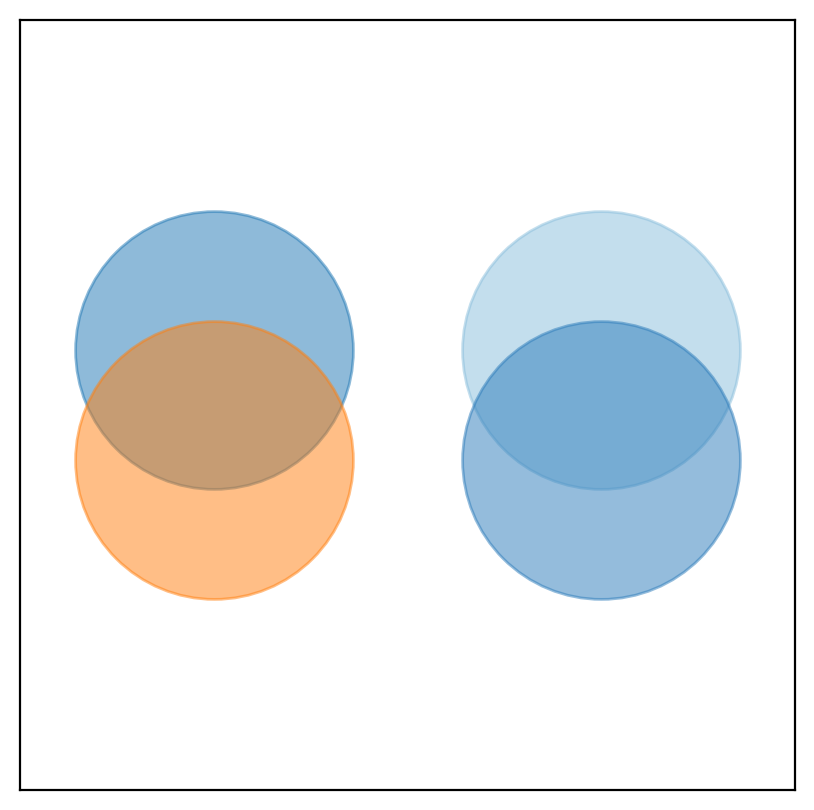

In [87]:
# Mitigating Issues with Transparency and Overlap
# It creats new color unseen in original data

plt.figure(figsize = [5,5])

# left: qualitative points
plt.scatter(0,0.5,s = 1e4, c = sns.color_palette()[0], alpha = 0.5)
plt.scatter(0,-0.5,s = 1e4, c = sns.color_palette()[1], alpha = 0.5)

# right: quantitative points
plt.scatter(1,0.5,s = 1e4, c = sns.color_palette('Blues')[2], alpha = 0.5)
plt.scatter(1,-0.5,s = 1e4, c = sns.color_palette('Blues')[4], alpha = 0.5)

# set axes for point overlap
plt.xlim(-0.5,1.5)
plt.ylim(-3.5,3.5)
plt.xticks([])
plt.yticks([])

In [88]:
# https://matplotlib.org/stable/users/explain/colors/colormaps.html

# https://seaborn.pydata.org/tutorial/color_palettes.html

# https://www.datawrapper.de/blog/how-to-choose-a-color-palette-for-choropleth-maps

### Faceting in Two Directions

In [ ]:
# data setup
    pokemon = pd.read_csv('../data/pokemon.csv')
    # plotting
    plt.figure(figsize = [8,6])
    plt.scatter(data = pokemon, x = 'defense', y = 'special-defense',
                c = 'speed')
    plt.colorbar(label = 'Speed')
    plt.xlim(0,160)
    plt.ylim(15,160)
    plt.xlabel('Defense')
    plt.ylabel('Special Defense');

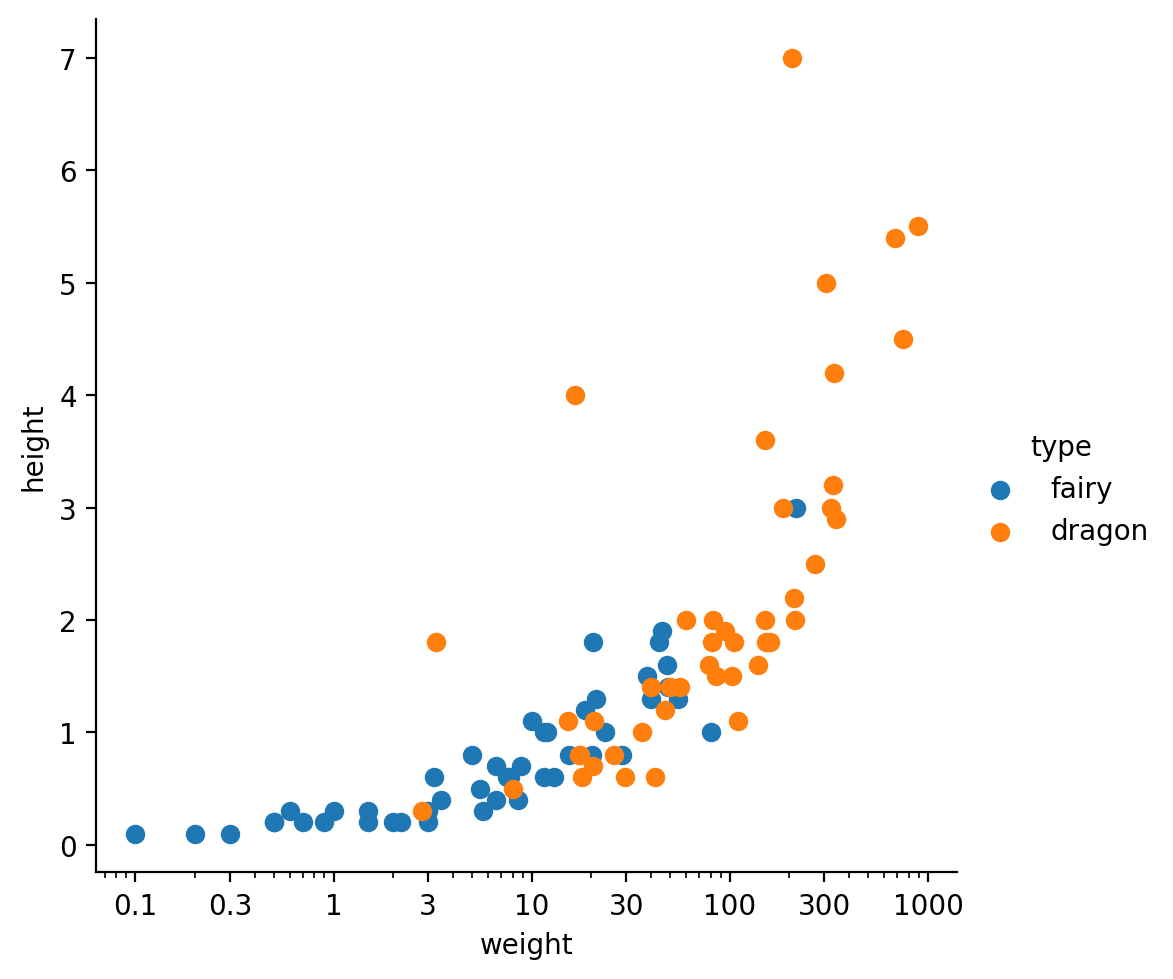

In [38]:
    # data setup
    pokemon = pd.read_csv('../data/pokemon.csv')
    type_cols = ['type_1','type_2']
    non_type_cols = pokemon.columns.difference(type_cols)
    pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, var_name = 'type_level', value_name = 'type').dropna()
    pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]
    # plotting
    g = sns.FacetGrid(data = pokemon_sub, hue = 'type', height = 5)
    g.map(plt.scatter, 'weight','height')
    g.set(xscale = 'log') # need to set scaling before customizing ticks
    x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
    g.set(xticks = x_ticks, xticklabels = x_ticks)
    g.add_legend();

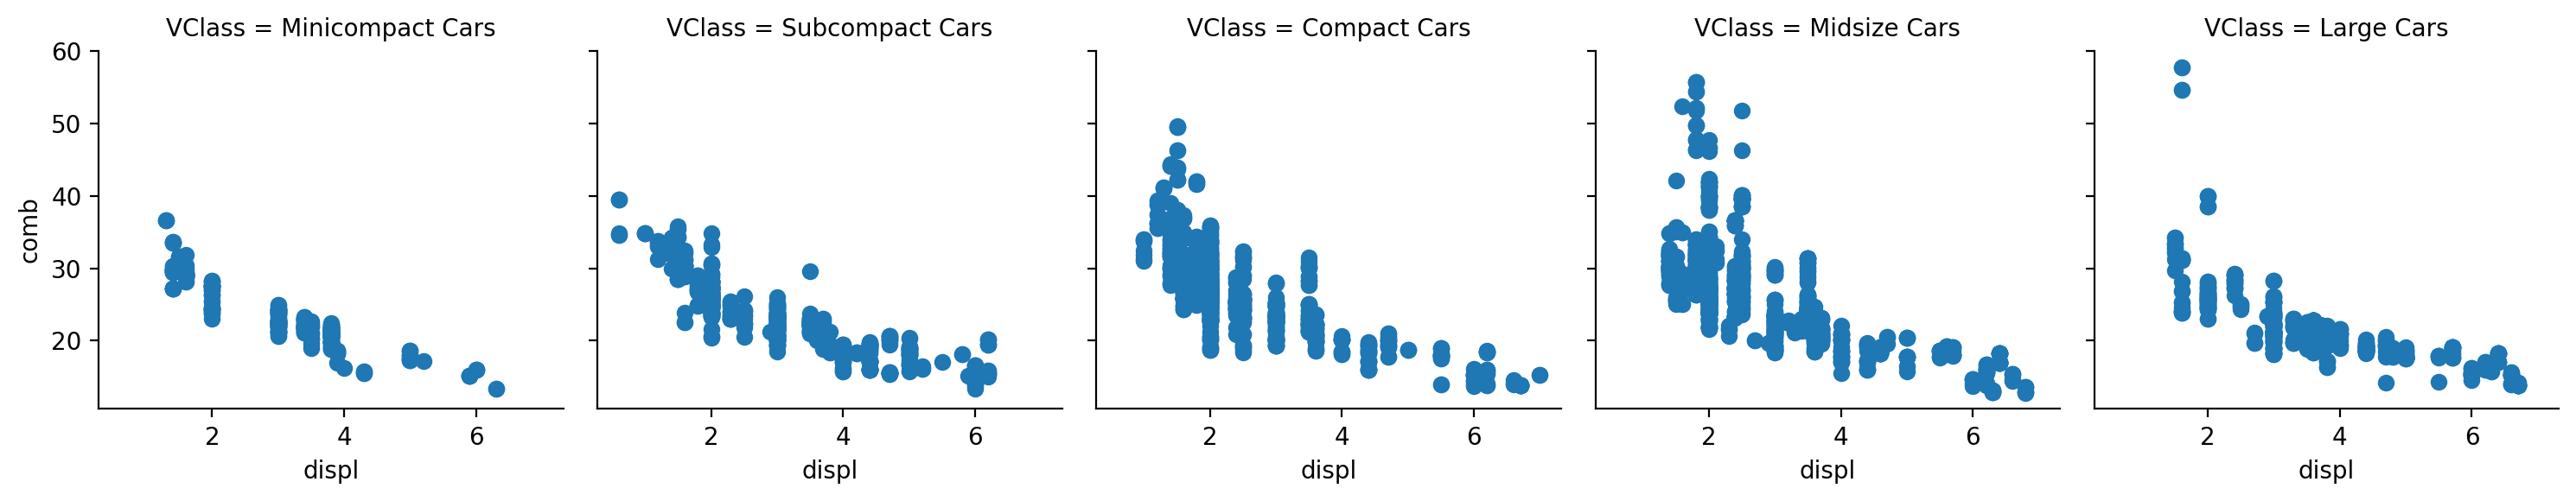

In [39]:
# Scatterplot Fuel Efficiency by Vehicle Class
g = sns.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.scatter, 'displ','comb')

In [43]:
# Scatterplot Fuel Efficiency by Vehicle Class and Transmission Type
# g = sns.FacetGrid(data = fuel_econ, col = 'VClass', row = 'trans', margin_titles = True)
# g.map(plt.scatter, 'displ','comb')

In [44]:
# g = sb.FacetGrid(data = df, col = 'cat_var1', size = 4)
# g.map(sb.boxplot, 'cat_var2', 'num_var2')

In [45]:
# g = sb.FacetGrid(data = df, col = 'cat_var2', row = 'cat_var1', size = 2.5, margin_titles = True)
# g.map(plt.scatter, 'num_var1', 'num_var2')

### Other Adaptations of Bivariate Plots

In [ ]:
sns.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color, hue = 'trans', ci = 'sd', linestyles = "", dodge = True);
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

/tmp/ipykernel_8053/3294894979.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data = fuel_econ, x = 'VClass', y = 'comb', hue = 'trans', ci = 'sd');


Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

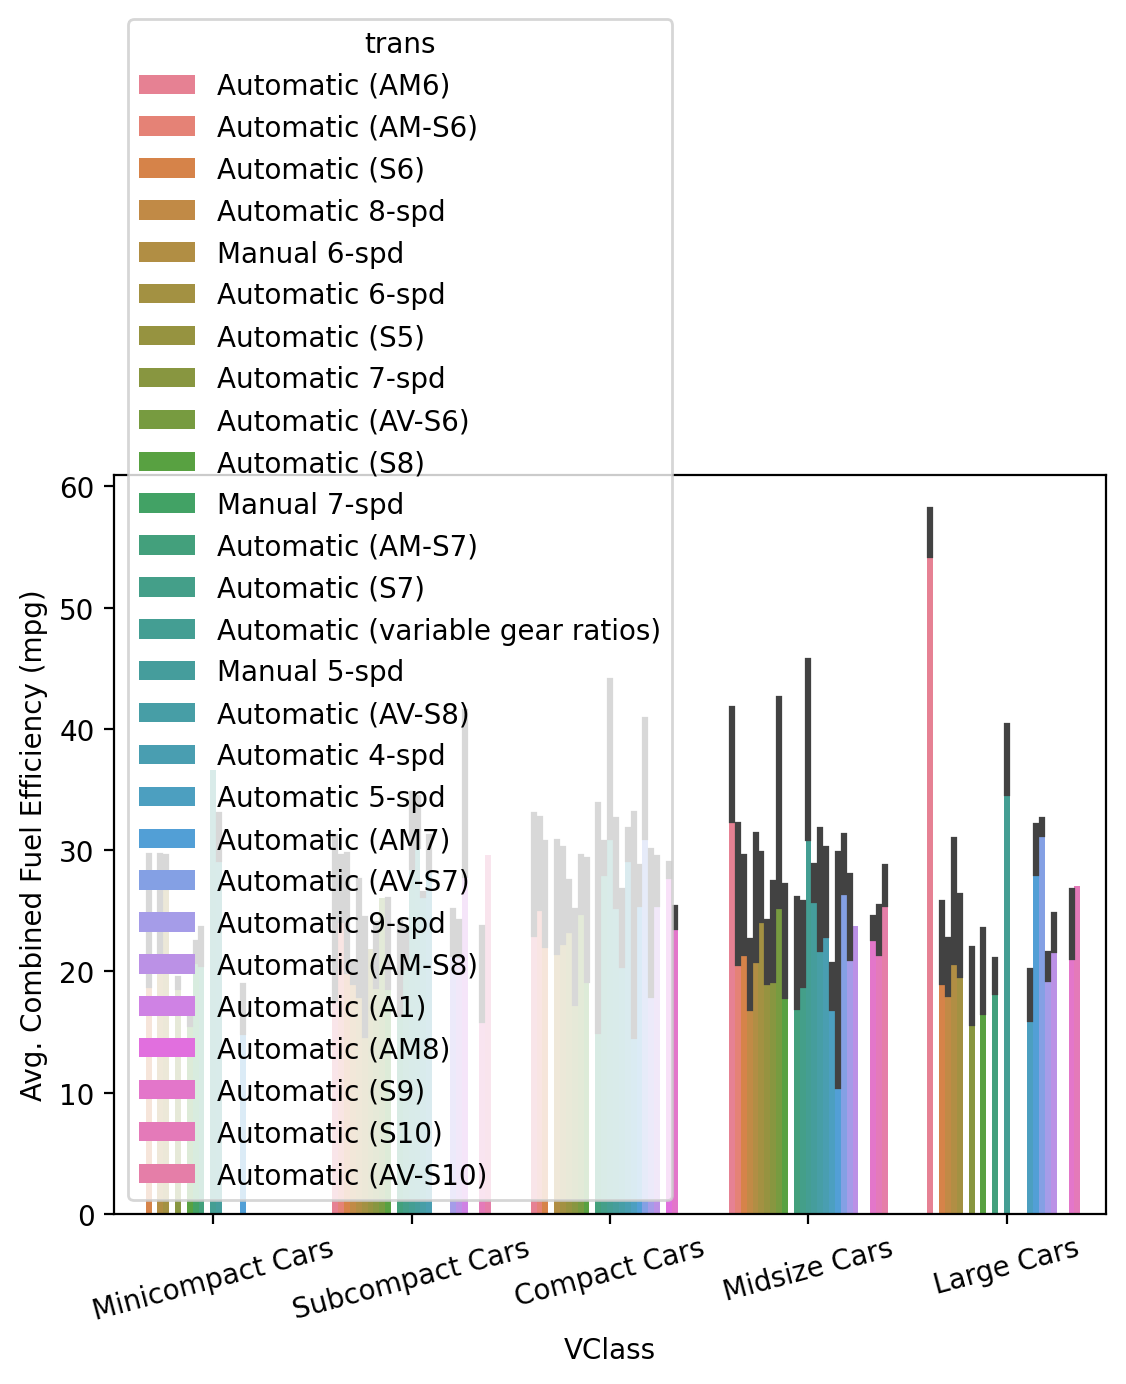

In [48]:
# Clustered Bar Plot of Fuel Efficiency by Vehicle Class and Transmission Type
sns.barplot(data = fuel_econ, x = 'VClass', y = 'comb', hue = 'trans', ci = 'sd');
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

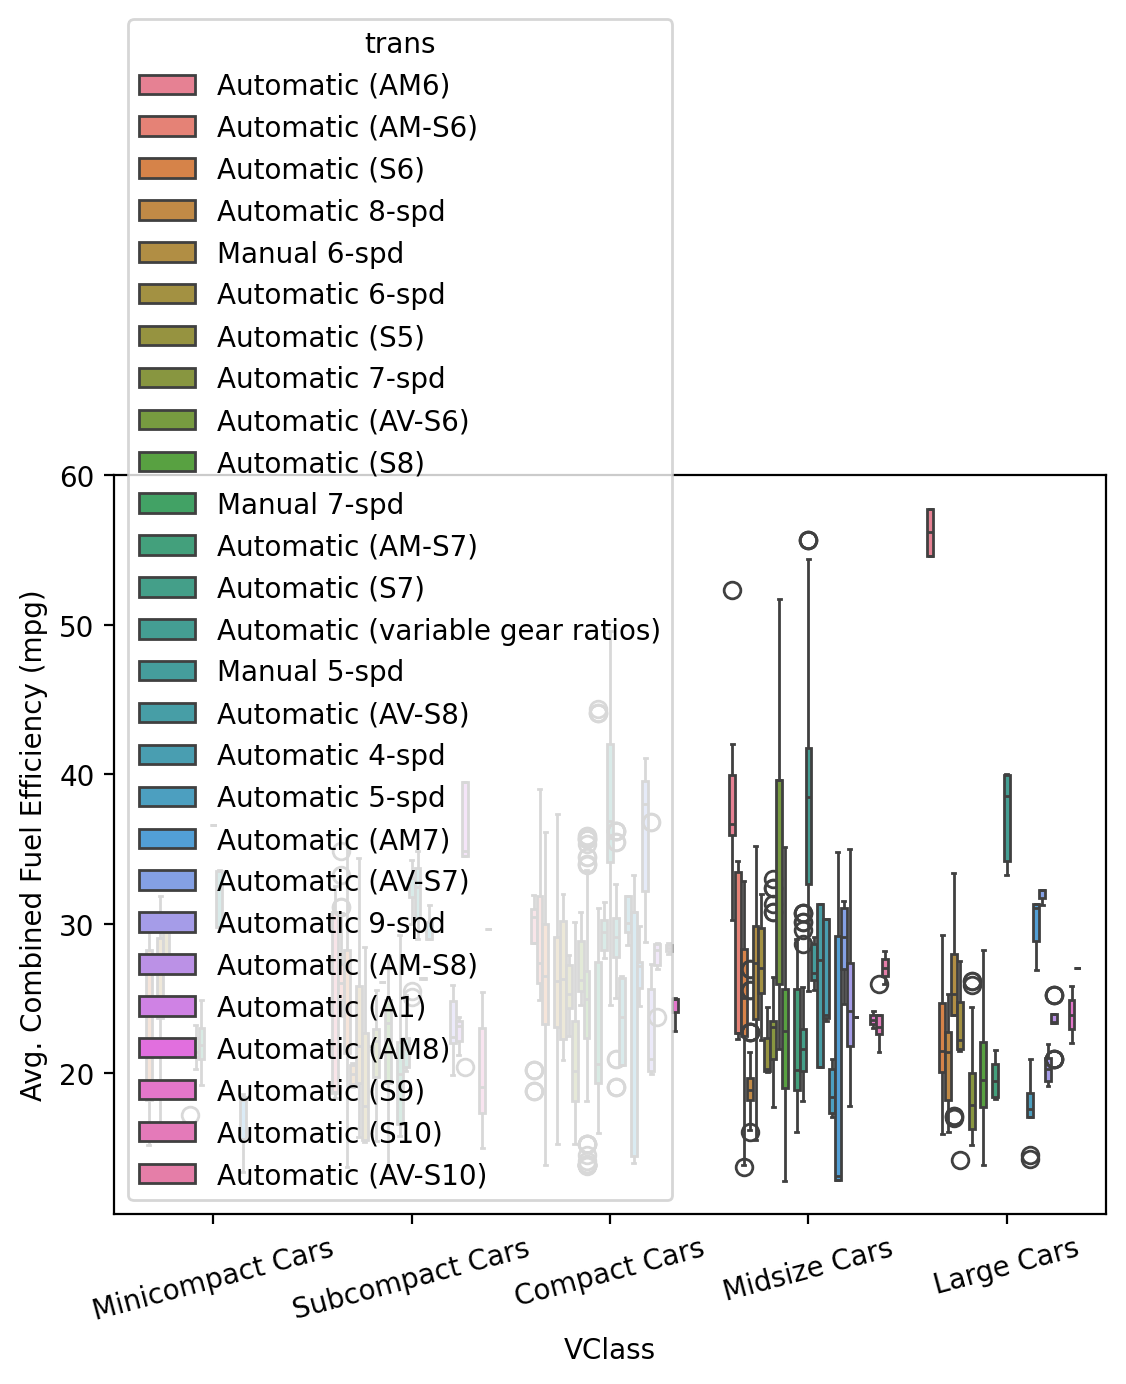

In [50]:
# Clustered Box Plot of Fuel Efficiency by Vehicle Class and Transmission Type
sns.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', hue = 'trans');
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

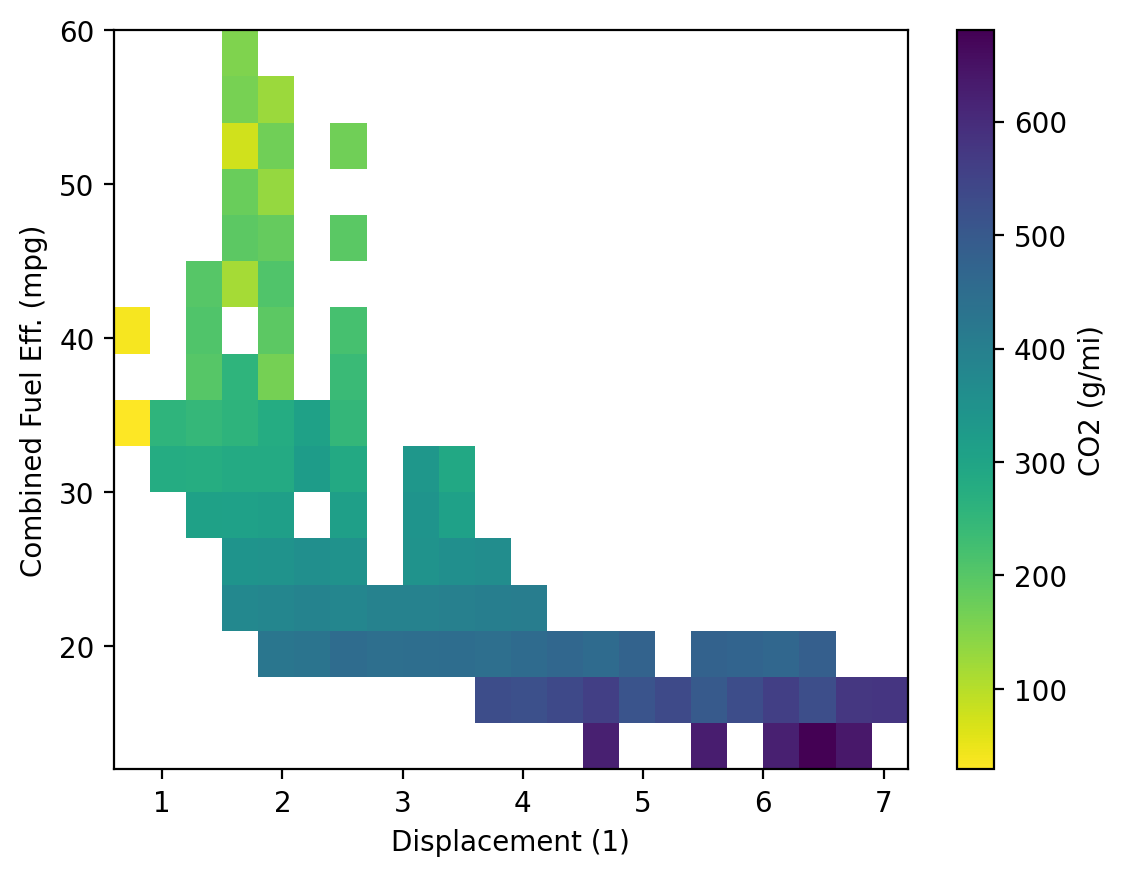

In [51]:
# Multivariate Heatmap
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

# Determine which bin for each point
displ_bins = pd.cut(fuel_econ['displ'], bins_x, right = False, include_lowest = False, labels = False).astype(int)
comb_bins = pd.cut(fuel_econ['comb'], bins_y, right = False, include_lowest = False, labels = False).astype(int)

# Count the points in each bin
n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
n_points = n_points.reset_index().pivot(index = 'displ', columns = 'comb').values

# Divide CO2 by the number of points in each bin
co2_weights = fuel_econ['co2'] / n_points[displ_bins, comb_bins]

# Plot the heatmap
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r', bins = [bins_x, bins_y], weights = co2_weights);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar(label = 'CO2 (g/mi)');

In [52]:
# xbin_edges = np.arange(0.25, df['num_var1'].max()+0.5, 0.5)
# ybin_edges = np.arange(7,    df['num_var2'].max()+0.5, 0.5)

# # count number of points in each bin
# xbin_idxs = pd.cut(df['num_var1'], xbin_edges, right = False,
#                     include_lowest = False, labels = False).astype(int)
# ybin_idxs = pd.cut(df['num_var2'], ybin_edges, right = False,
#                     include_lowest = False, labels = False).astype(int)

# pts_per_bin = df.groupby([xbin_idxs, ybin_idxs]).size()
# pts_per_bin = pts_per_bin.reset_index()
# pts_per_bin = pts_per_bin.pivot(index = 'num_var1', columns = 'num_var2').values

# z_wts = df['num_var3'] / pts_per_bin[xbin_idxs, ybin_idxs]

# # plot the data using the calculated weights
# plt.hist2d(data = df, x = 'num_var1', y = 'num_var2', weights = z_wts,
#            bins = [xbin_edges, ybin_edges], cmap = 'viridis_r', cmin = 0.5);
# plt.xlabel('num_var1')
# plt.ylabel('num_var2');
# plt.colorbar(label = 'mean(num_var3)');

In [53]:
# cat_means = df.groupby(['cat_var1', 'cat_var2']).mean()['num_var2']
# cat_means = cat_means.reset_index(name = 'num_var2_avg')
# cat_means = cat_means.pivot(index = 'cat_var2', columns = 'cat_var1',
#                             values = 'num_var2_avg')
# sb.heatmap(cat_means, annot = True, fmt = '.3f',
#            cbar_kws = {'label' : 'mean(num_var2)'})

In [54]:
# ax = sb.barplot(data = df, x = 'cat_var1', y = 'num_var2', hue = 'cat_var2')
# ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')

In [55]:
# ax = sb.pointplot(data = df, x = 'cat_var1', y = 'num_var2', hue = 'cat_var2',dodge = 0.3, linestyles = "")

In [56]:
# def mean_poly(x, y, bins = 10, **kwargs):
#     """ Custom adapted line plot code. """
#     # set bin edges if none or int specified
#     if type(bins) == int:
#         bins = np.linspace(x.min(), x.max(), bins+1)
#     bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
    
#     # compute counts
#     data_bins = pd.cut(x, bins, right = False,
#                        include_lowest = True)
#     means = y.groupby(data_bins).mean()
    
#     # create plot
#     plt.errorbar(x = bin_centers, y = means, **kwargs)
    
# bin_edges = np.arange(0.25, df['num_var1'].max()+0.5, 0.5)
# g = sb.FacetGrid(data = df, hue = 'cat_var2', size = 5)
# g.map(mean_poly, "num_var1", "num_var2", bins = bin_edges)
# g.set_ylabels('mean(num_var2)')
# g.add_legend()

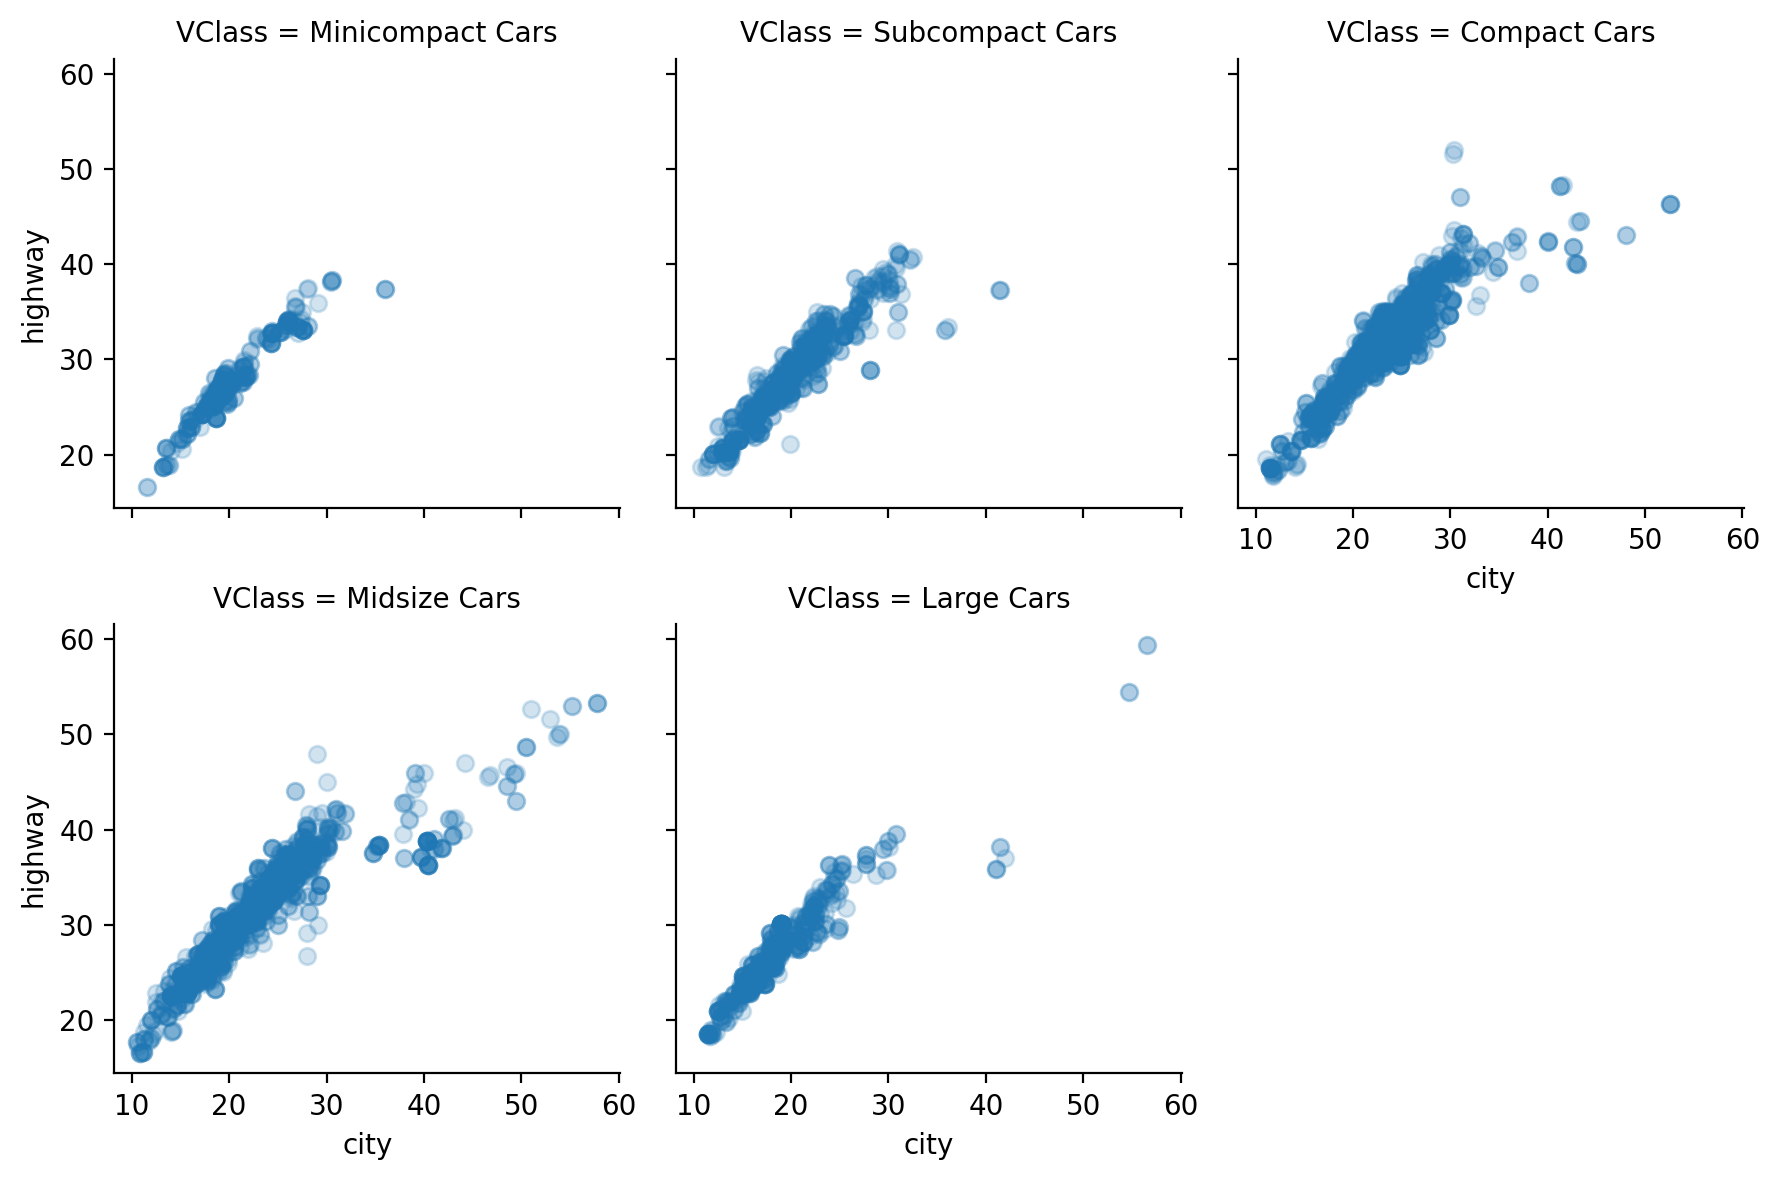

In [58]:
def adaptedplot_solution_1():
    # data setup
    fuel_econ = pd.read_csv('../data/fuel_econ.csv')
    sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
        fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
    else: # compatibility for v.20
        fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True, categories = sedan_classes)
    # plotting
    g = sns.FacetGrid(data = fuel_econ, col = 'VClass', height = 3, col_wrap = 3)
    g.map(plt.scatter, 'city', 'highway', alpha = 1/5)
adaptedplot_solution_1()

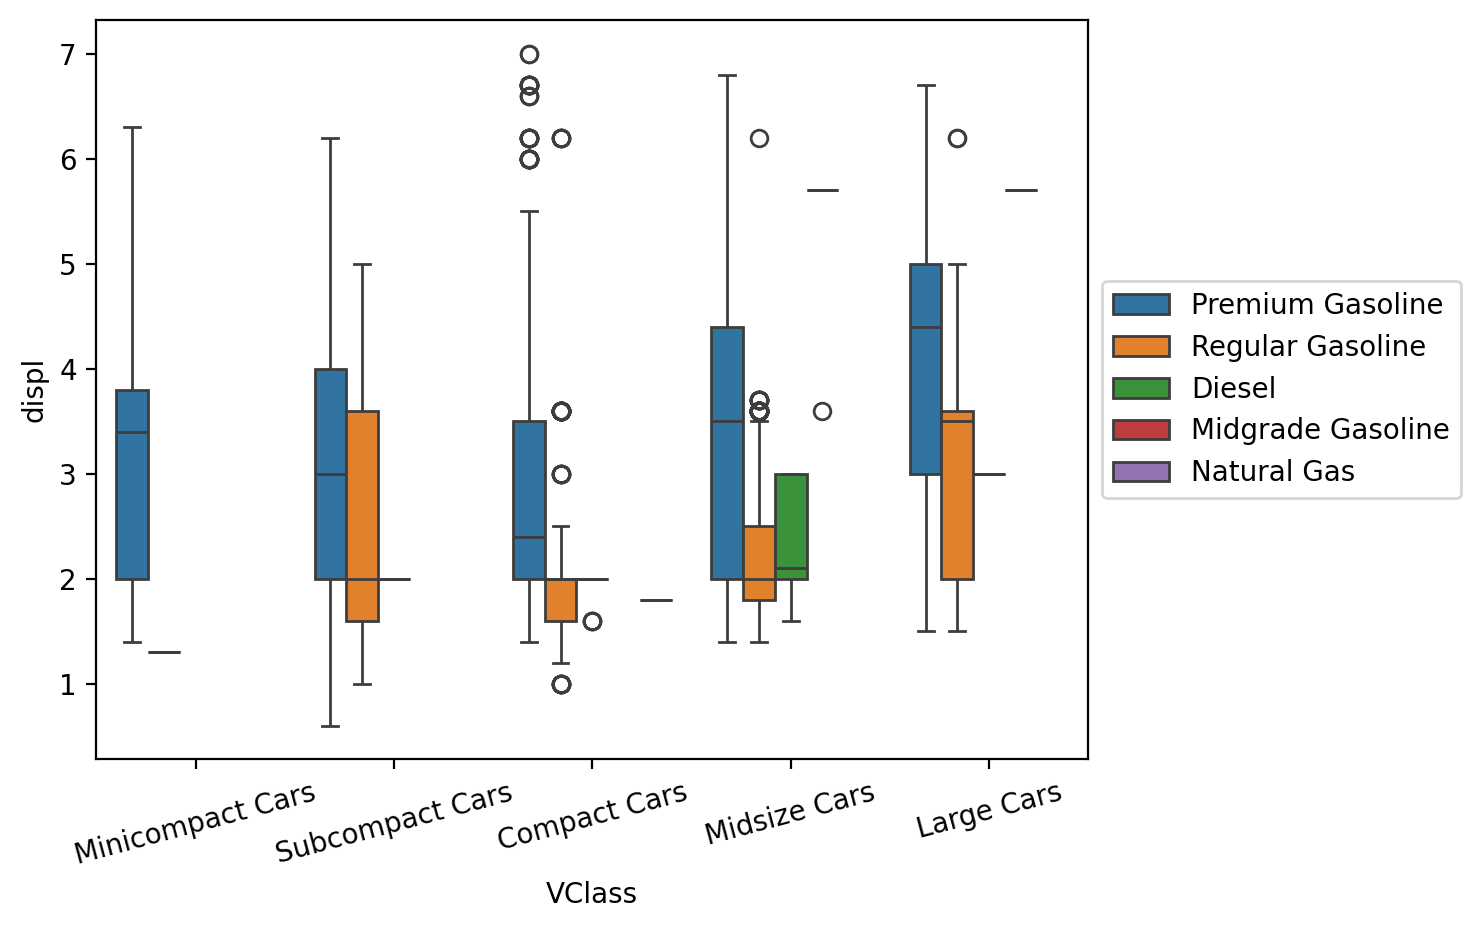

In [ ]:
def adaptedplot_solution_2():
    # data setup
    fuel_econ = pd.read_csv('../data/fuel_econ.csv')
    sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
        fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
    else: # compatibility for v.20
        fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True, categories = sedan_classes)
    fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
    # plotting
    sns.boxplot(data = fuel_econ, x = 'VClass', y = 'displ', hue = 'fuelType')
    plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
    plt.xticks(rotation = 15)
adaptedplot_solution_2()

### Plot Matrices

In [ ]:
pokemon = pd.read_csv('../data/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

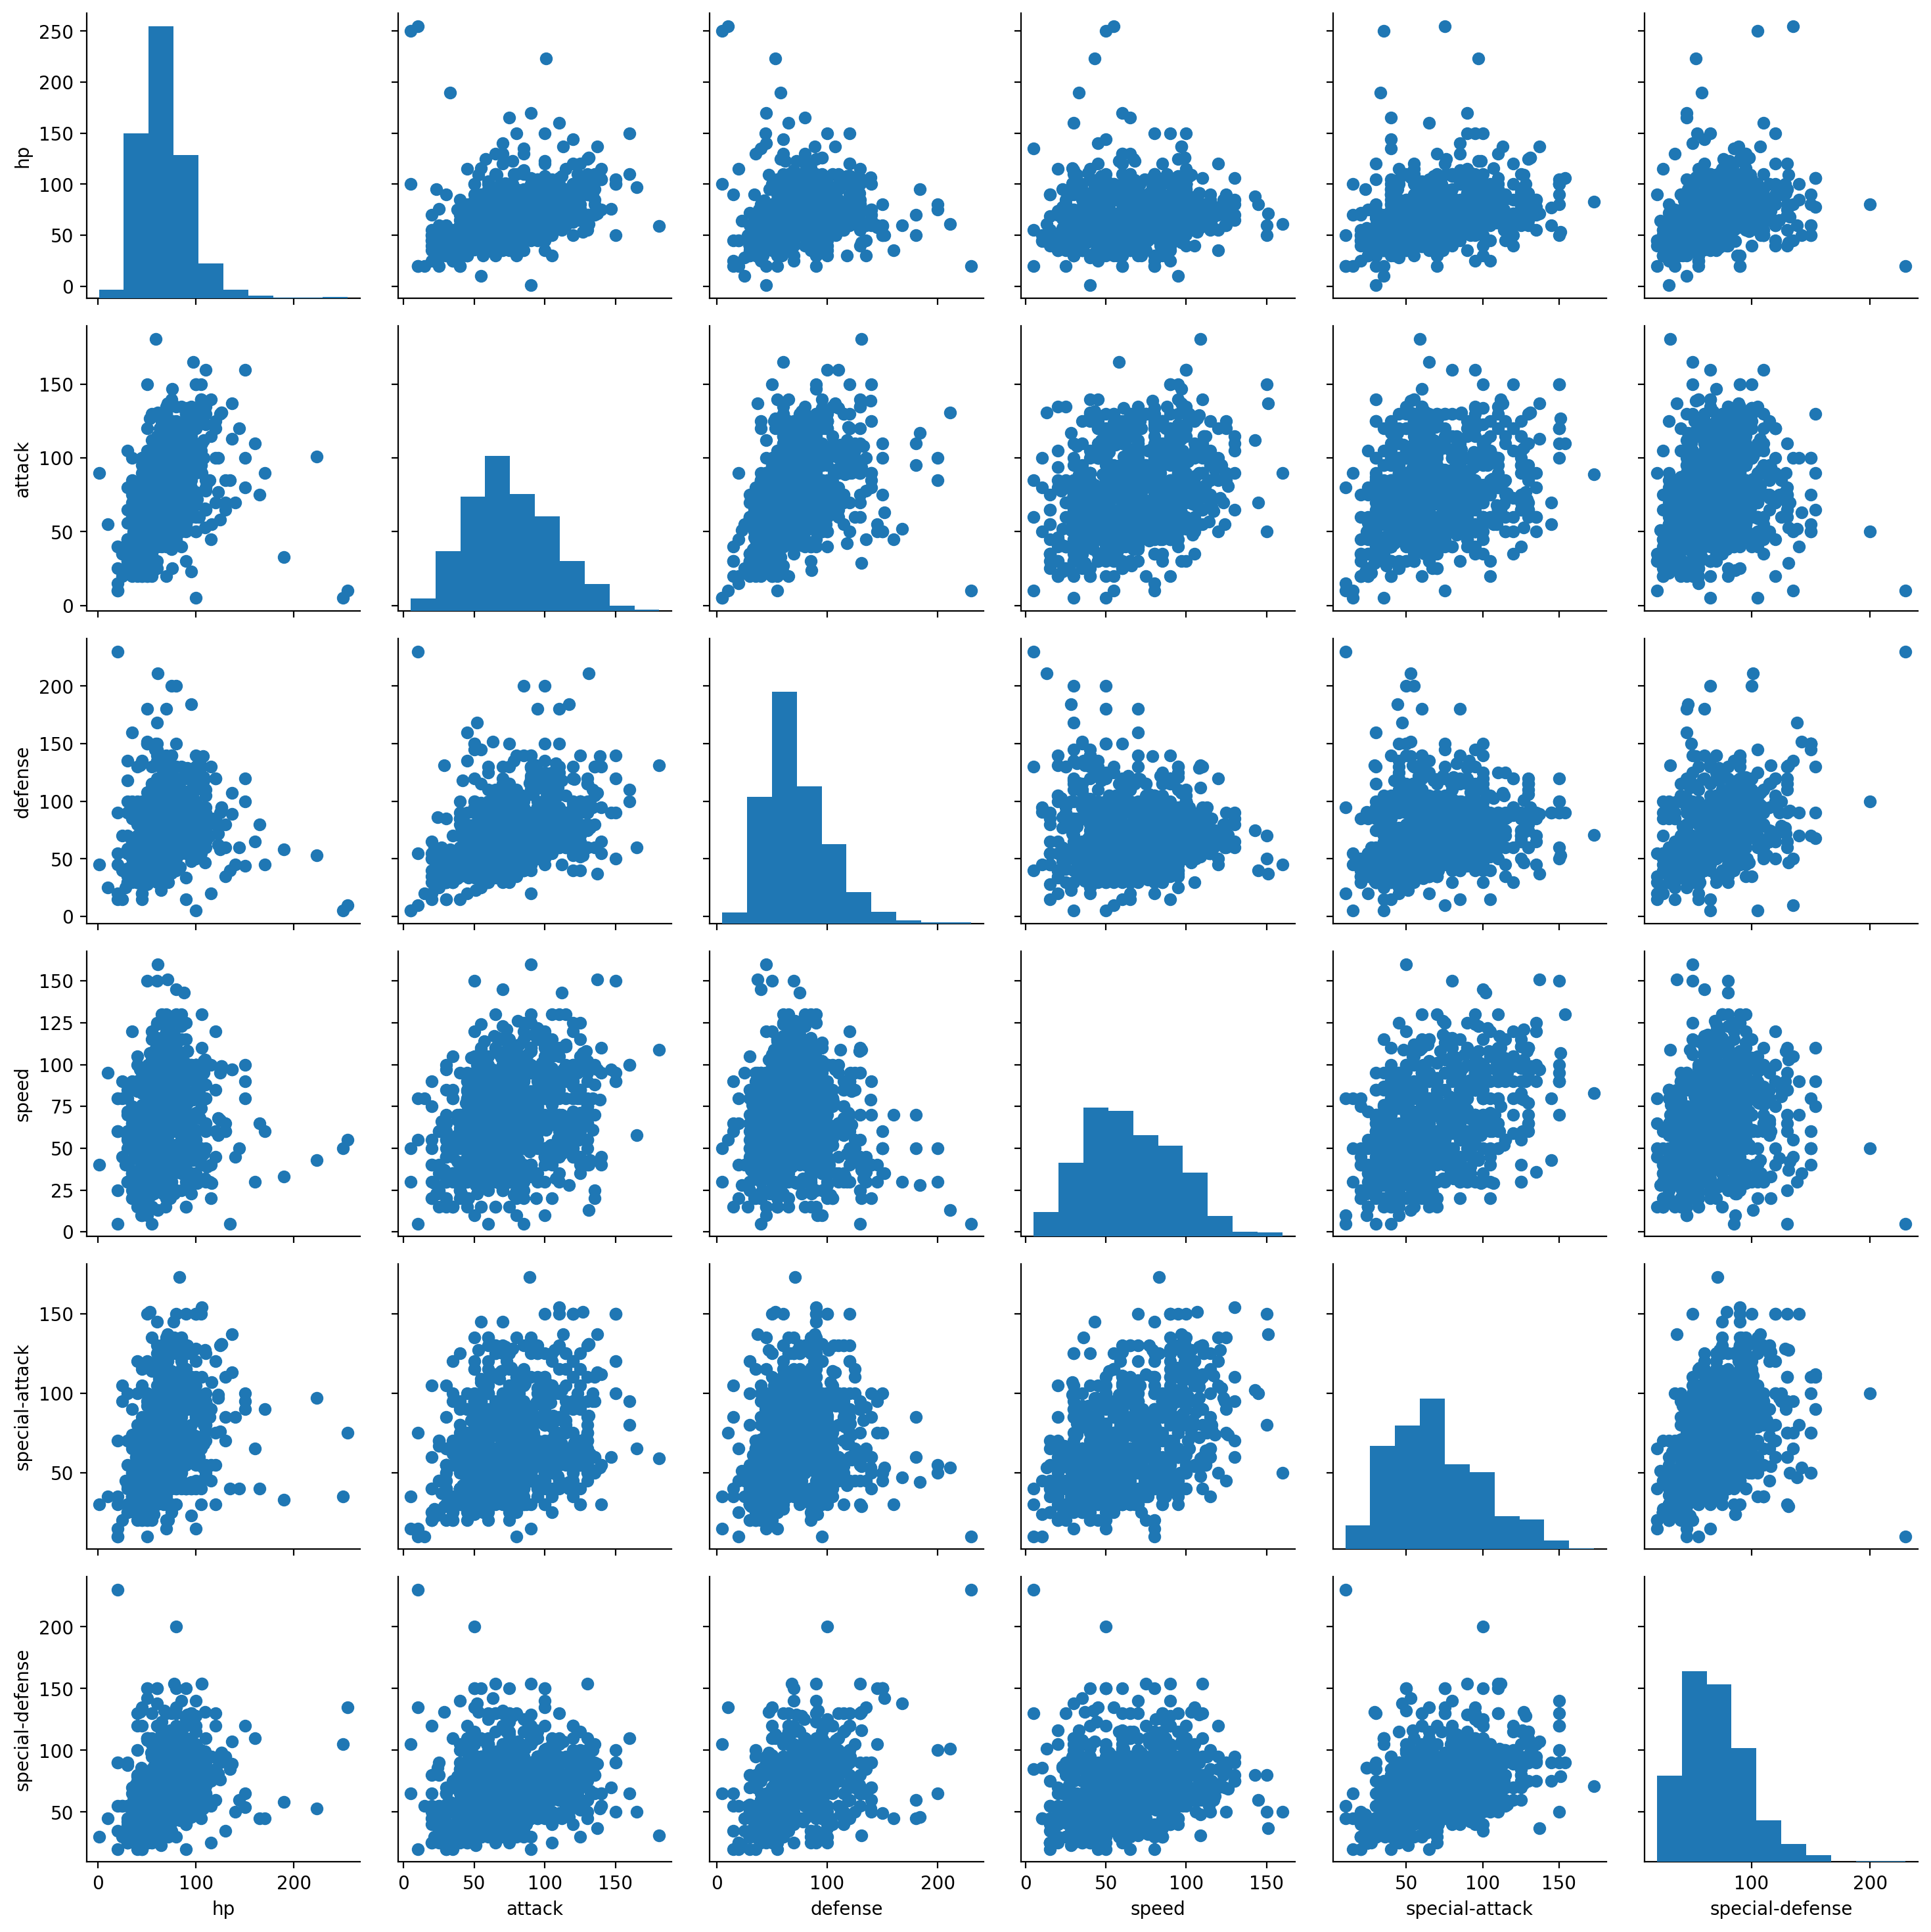

In [62]:

# Plot Matrix: Pokemon Stats
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sns.PairGrid(data = pokemon, vars = pkmn_stats);
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

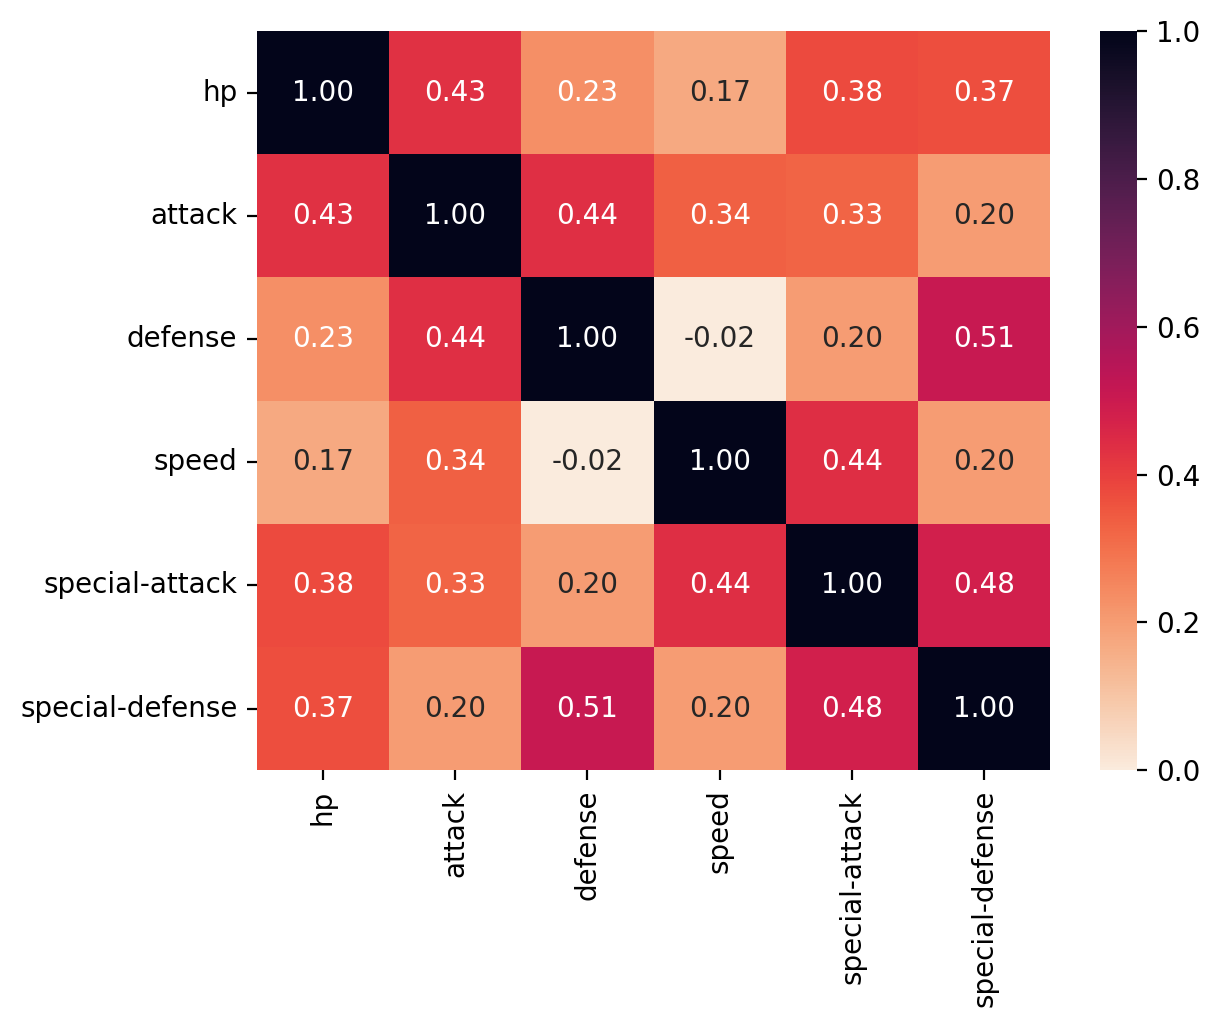

In [66]:
# Correlations Heatmap
sns.heatmap(pokemon[pkmn_stats].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f', vmin = 0);

### Feature Engineering

In [ ]:
# Build new features as function to existing variables

In [ ]:
# This contrasts with faceting, where rows and columns will subset the data, and the same variables are depicted in each subplot.

# g = sb.PairGrid(data = df, vars = ['num_var1', 'num_var2', 'num_var3'])
# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter)

In [68]:
# g = sb.PairGrid(data = df, x_vars = ['num_var1', 'num_var2', 'num_var3'],y_vars = ['cat_var1','cat_var2'])
# g.map(sb.violinplot, inner = 'quartile')

In [70]:
# Correlation Matrices

# sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

In [71]:
# https://policyviz.com/2017/11/02/choosing-map-bins/#google_vignette

### Additional examples

In [ ]:
def additionalplot_solution_1():
    # data setup
    fuel_econ = pd.read_csv('../data/fuel_econ.csv')
    # plotting
    g = sns.PairGrid(data = fuel_econ, vars = ['displ', 'co2', 'city', 'highway', 'comb'])
    g.map_diag(plt.hist)
    g.map_offdiag(plt.scatter)
additionalplot_solution_1()

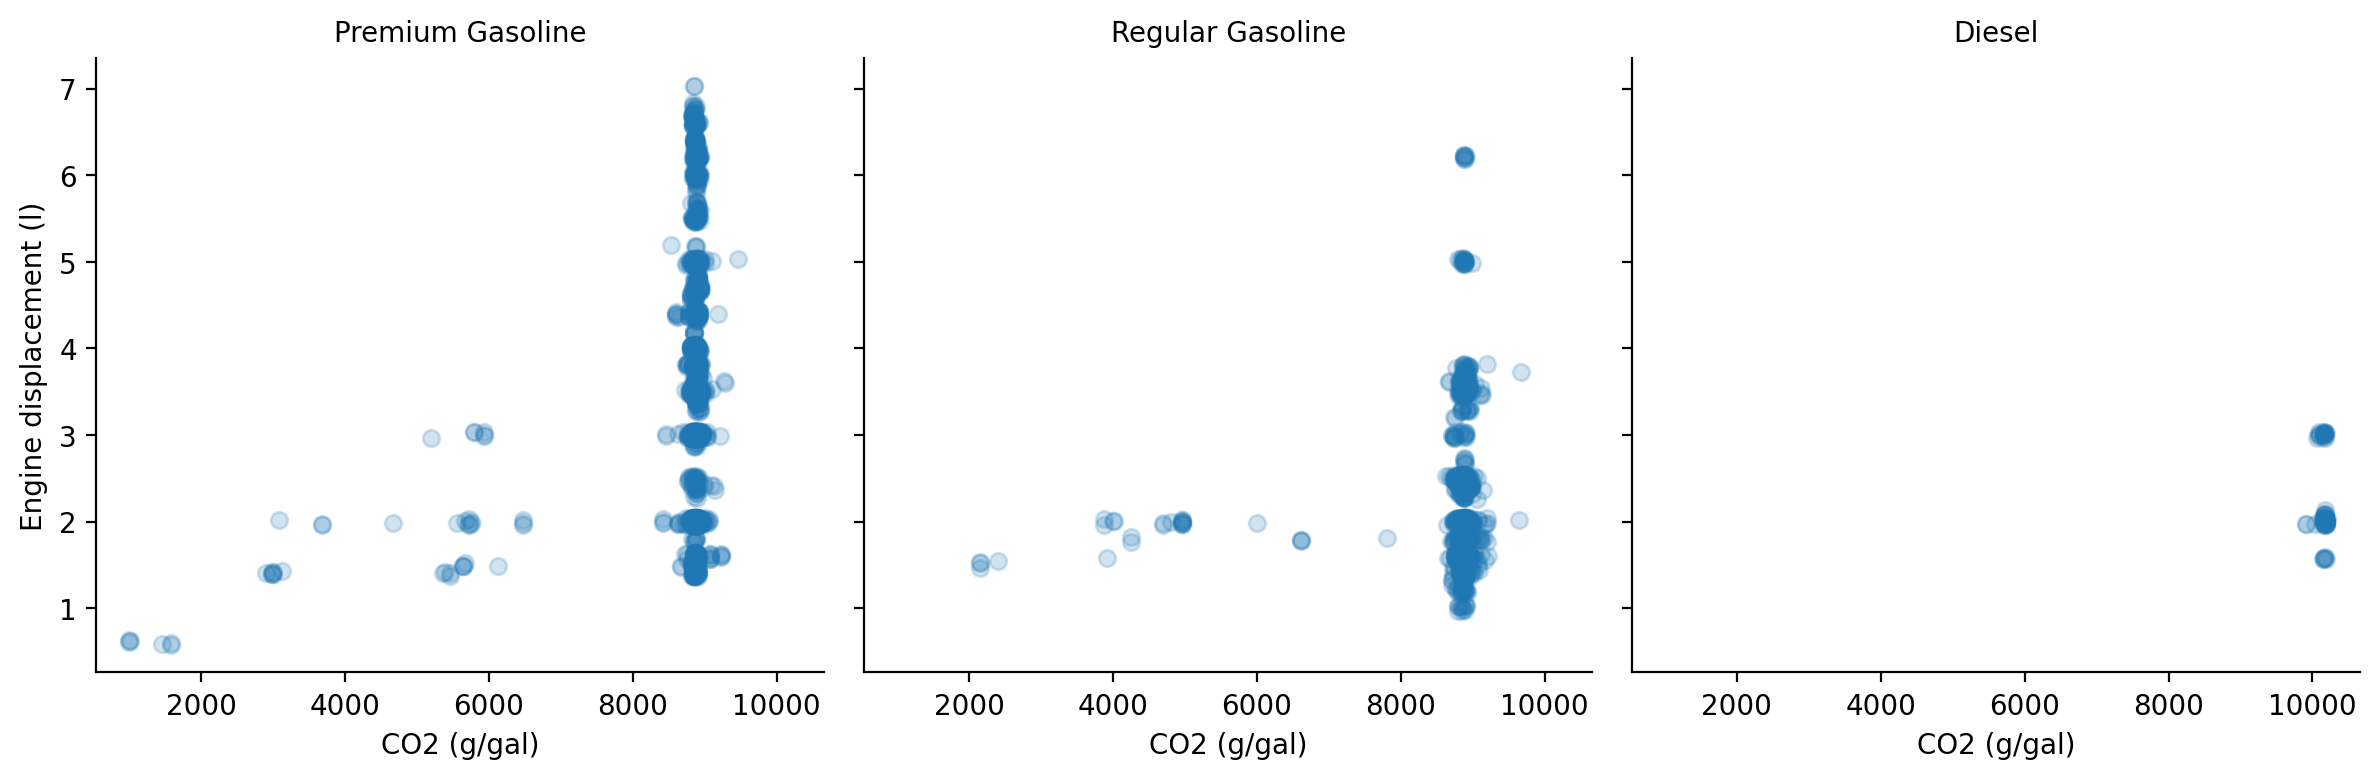

In [74]:
def additionalplot_solution_2():
    # data setup
    fuel_econ = pd.read_csv('../data/fuel_econ.csv')
    fuel_econ['co2_gal'] = fuel_econ['comb'] * fuel_econ['co2']
    fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline', 'Diesel'])]
    # plotting
    g = sns.FacetGrid(data = fuel_econ_sub, col = 'fuelType', height = 4, col_wrap = 3)
    g.map(sns.regplot, 'co2_gal', 'displ', y_jitter = 0.04, fit_reg = False, scatter_kws = {'alpha' : 1/5})
    g.set_ylabels('Engine displacement (l)')
    g.set_xlabels('CO2 (g/gal)')
    g.set_titles('{col_name}') 
additionalplot_solution_2()

## More docs

In [89]:
# https://nbconvert.readthedocs.io/en/latest/

In [90]:
# jupyter nbconvert presentation.ipynb --to slides

In [91]:
# https://github.com/hakimel/reveal.js#installation

# jupyter nbconvert presentation.ipynb --to slides --template output-toggle.tpl --post serve

In [92]:
# Additionally, running the base expression will not automatically open up the slide deck for viewing. 
# In order to serve the slides, you would need to install a local copy of reveal.js (Installation documentation(opens in a new tab)), 
# make sure that your HTML slides point to the library correctly (using the --reveal-prefix option), and then start a local http server 
# (e.g., via python -m http.server). Alternatively, you can add the --post serve option to your expression to make use of a public, online version of reveal.js, 
# start up a server, and immediately open a tab in your web browser with the slide deck ready to navigate.

In [ ]:
# Questions to test audience

# What do you notice about each visualization?
# What questions do you have about the data?
# What relationships do you notice?
# What do you think is the main takeaway from the report / presentation?
# Is there anything that you don’t understand from the plots?